# **Advanced Regression on House Pricing Assesment**
>*By Yeshvanth H J*

## Business Understanding

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price

## **Objective**

**The company wants to know:**

* Which variables are significant in predicting the price of a house.
* How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.



**Goal**
- Build a model to identify the varible which are significant
- It will be used by the management to understand how exactly the prices vary with the variables.

[Click here for Data Definitions](https://cdn.upgrad.com/UpGrad/temp/87f67e28-c47e-4725-ae3c-111142c7eaba/data_description.txt)

The Steps we will follow in this Assesment are as follows:

1. Reading, understanding and visualising the data
2. Preparing the data for modelling (train-test, split, rescalling etc..)
3. Training the model
4. Residual analysis
5. Predictions and evaluation on the test set

## Reading, understanding and visualising the data

In [502]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model,metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm
import os

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',500)


In [503]:
house_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Course 3: ML2/Assignment - Advanced Regression/train.csv')
house_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [504]:
# Checking shape of data
house_df.shape

(1460, 81)

In [505]:
house_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [506]:
# Data type & non-null values
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [507]:
# Handling null & Missing values
Missing_Value_Count= house_df.loc[:,house_df.isnull().sum()>0].isnull().sum().sort_values(ascending=False)
Missing_Value_Percentage=round(100*(house_df.loc[:,house_df.isnull().sum()>0].isnull().sum())/len(house_df),2).sort_values(ascending=False)

# Joining two data frames
Missing_Value_df=pd.concat([Missing_Value_Count,Missing_Value_Percentage],axis=1,keys=['Missing_Value_Count','Missing_Value_Percentage'])
Missing_Value_df


Missing_Value_Count  Missing_Value_Percentage
PoolQC                       1453                     99.52
MiscFeature                  1406                     96.30
Alley                        1369                     93.77
Fence                        1179                     80.75
FireplaceQu                   690                     47.26
LotFrontage                   259                     17.74
GarageType                     81                      5.55
GarageYrBlt                    81                      5.55
GarageFinish                   81                      5.55
GarageQual                     81                      5.55
GarageCond                     81                      5.55
BsmtExposure                   38                      2.60
BsmtFinType2                   38                      2.60
BsmtFinType1                   37                      2.53
BsmtCond                       37                      2.53
BsmtQual                       37                      2.53
MasVnrArea                      8                      0.55
MasVnrType                      8                      0.55
Electrical                      1                      0.07

In [508]:
# Lets drop the columns with high missing values & Id will not add any vaues to our analysis
house_df=house_df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','Id'],axis=1)

In [509]:
# Handling null & Missing values
Missing_Value_Count= house_df.loc[:,house_df.isnull().sum()>0].isnull().sum().sort_values(ascending=False)
Missing_Value_Percentage=round(100*(house_df.loc[:,house_df.isnull().sum()>0].isnull().sum())/len(house_df),2).sort_values(ascending=False)

# Joining two data frames
Missing_Value_df=pd.concat([Missing_Value_Count,Missing_Value_Percentage],axis=1,keys=['Missing_Value_Count','Missing_Value_Percentage'])
Missing_Value_df

Missing_Value_Count  Missing_Value_Percentage
LotFrontage                   259                     17.74
GarageType                     81                      5.55
GarageYrBlt                    81                      5.55
GarageFinish                   81                      5.55
GarageQual                     81                      5.55
GarageCond                     81                      5.55
BsmtExposure                   38                      2.60
BsmtFinType2                   38                      2.60
BsmtQual                       37                      2.53
BsmtCond                       37                      2.53
BsmtFinType1                   37                      2.53
MasVnrType                      8                      0.55
MasVnrArea                      8                      0.55
Electrical                      1                      0.07

In [510]:
null_col=house_df.loc[:,house_df.isnull().sum()>0].columns
null_col

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond'],
      dtype='object')

In [511]:
cat_null_col=house_df[null_col].select_dtypes('object').columns

In [512]:
for col in null_col:
  print(col)
  print(house_df[col].value_counts())
  print('\n')

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3


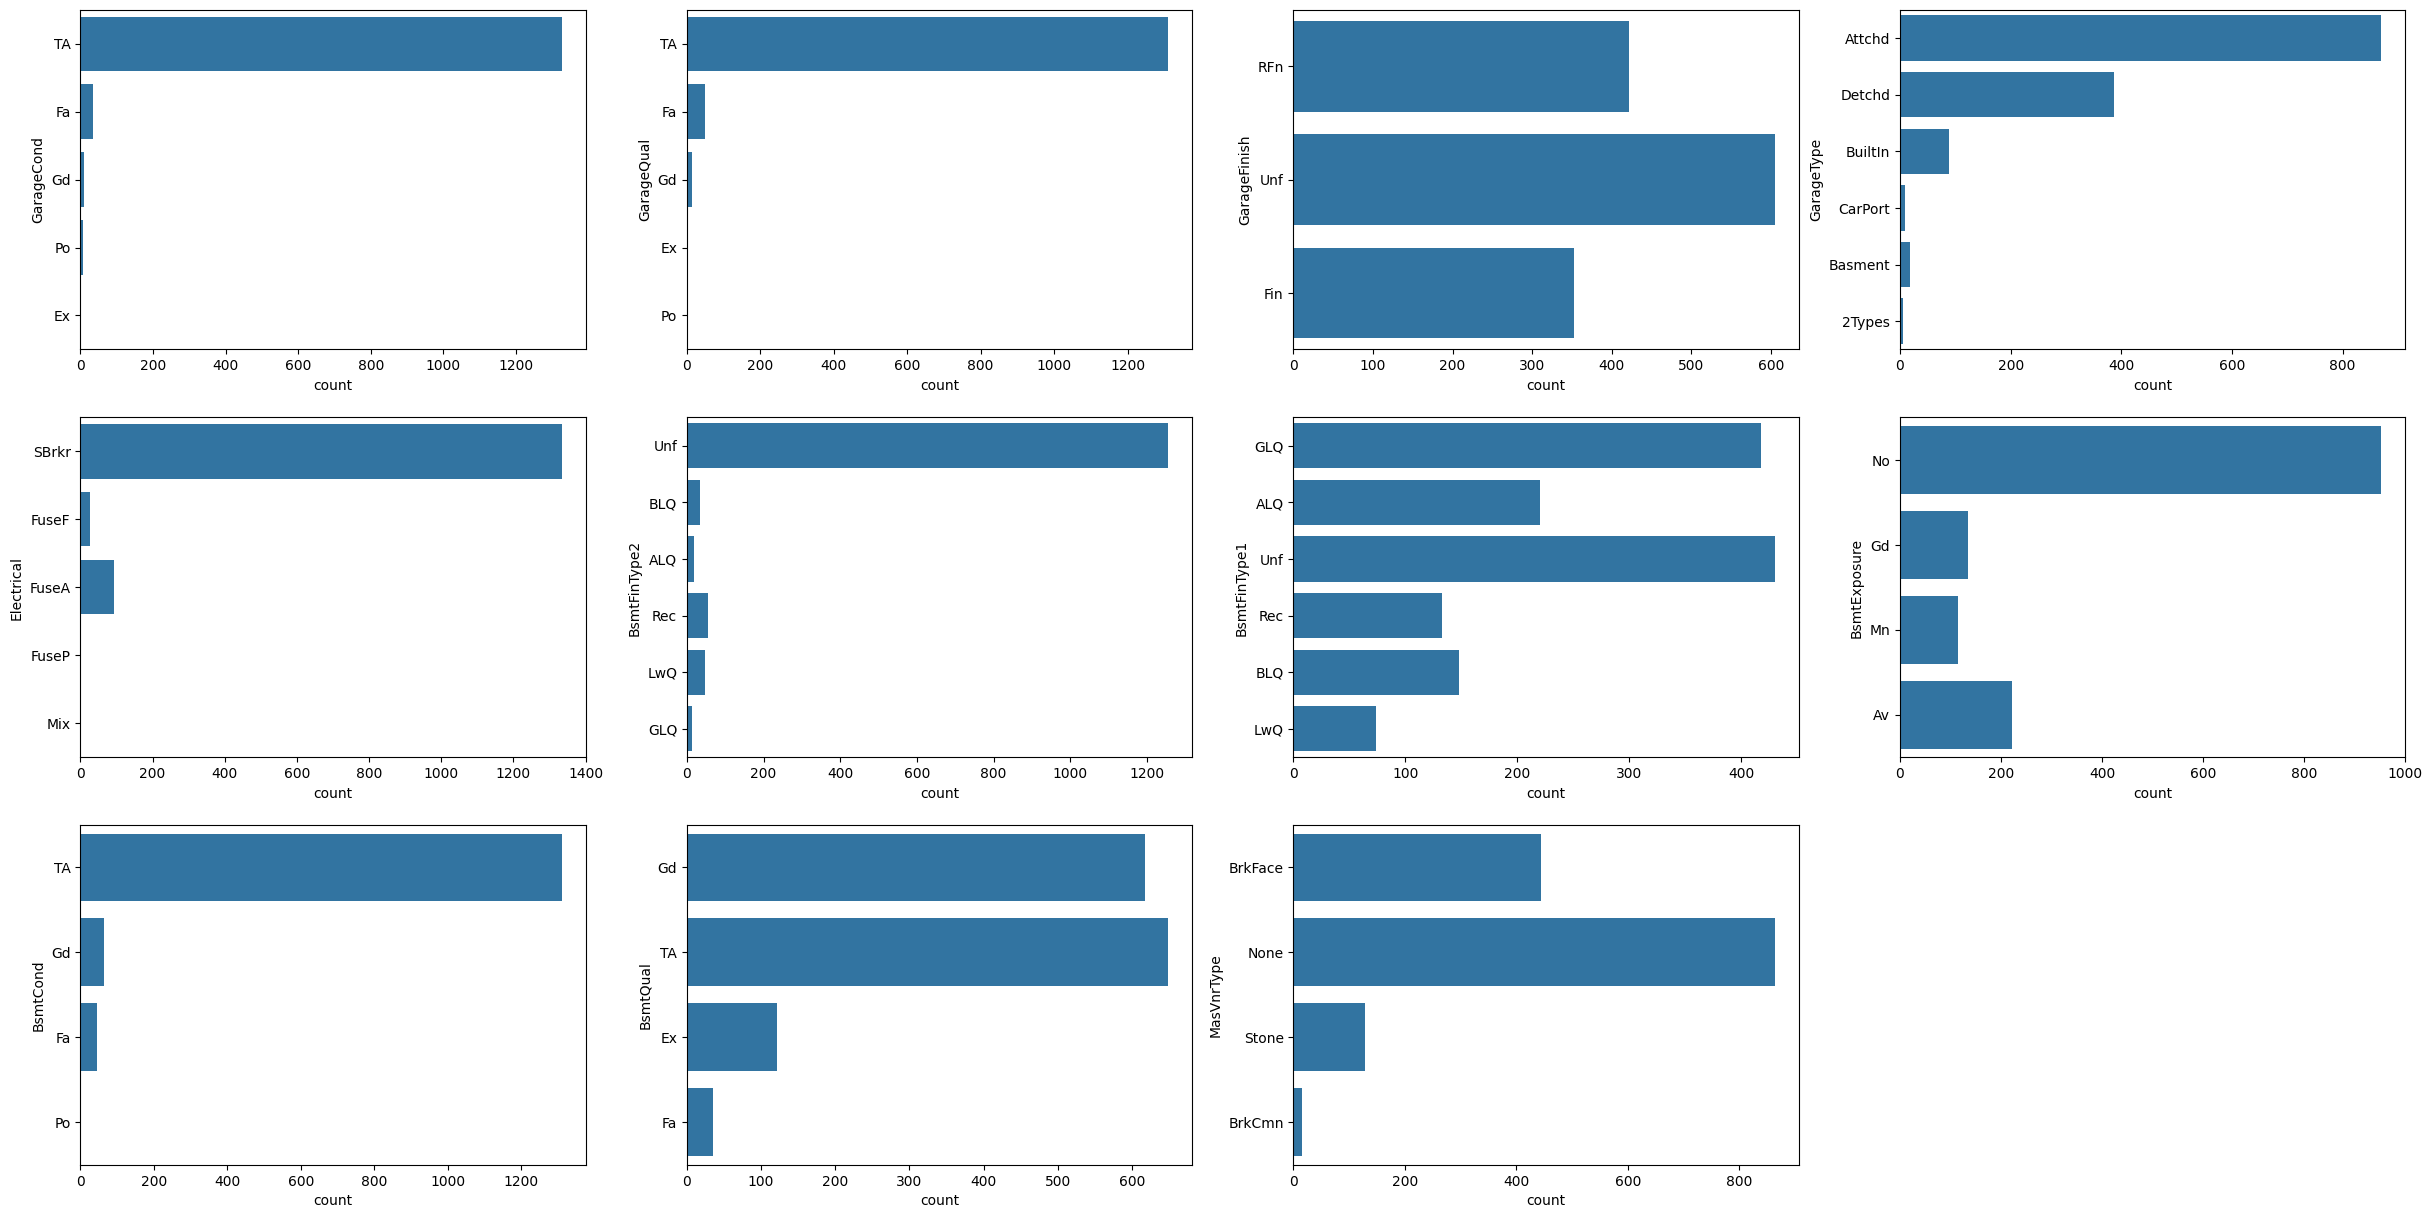

In [513]:
# Visulize the missing value fields
plt.figure(figsize=(30,15))
i=len(cat_null_col)
for col in cat_null_col:
  plt.subplot(round(len(cat_null_col)/4),4,i)
  sns.countplot(house_df[col])
  plt.title
  i=i-1
plt.show()

In [514]:
null_col

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond'],
      dtype='object')

In [515]:
# Splitting the variables to fill accoding with data dictonary & above graph
median_fill=['LotFrontage','MasVnrArea','GarageYrBlt']
mode_fill=['Electrical','GarageCond','GarageQual','GarageType','BsmtFinType2','BsmtExposure','BsmtCond','MasVnrType']
NA_fill=['BsmtQual','BsmtFinType1','GarageFinish']


In [516]:
#import missing values for 'LotFrontage','MasVnrArea',GarageYrBlt with median due to oulier in data
for col in median_fill:
  house_df[col]=house_df[col].fillna(house_df[col].median())

In [517]:
#import missing values of Electrical with mode due to categorical col
for col in mode_fill:
  house_df[col]=house_df[col].fillna(house_df[col].mode()[0])

In [518]:
# Based on the dictionary nan in ' is replacing with 'NA' means 'No Garage'
for col in NA_fill:
  house_df[col]=house_df[col].fillna(house_df[col].mode()[0])

In [519]:
# Checking once again is still any nun values are exist.
round(100*(house_df.loc[:,house_df.isnull().sum()>0].isnull().sum())/len(house_df),2).sort_values(ascending=False)

Series([], dtype: float64)

In [520]:
house_df.isnull().values.any()

False

In [521]:
# Check if any duplicate & drop
print("Before ", house_df.shape)
house_df=house_df.drop_duplicates()
print("After ", house_df.shape)

Before  (1460, 75)
After  (1460, 75)


In [522]:
house_df['BsmtFinType2'].nunique() <10

True

In [523]:
#Checking if depending on single values and it won't add any additional information.
for col in house_df.columns:
  if house_df[col].dtype !='object' and house_df[col].nunique() <25:
    print(col)
    print(house_df[col].value_counts())
    print('\n')

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64


OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64


LowQualFinSF
0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: LowQualFinSF, dtype: int64


BsmtFullBath
0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64


BsmtHalfBath
0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64


FullBath
2    768
1 

In [524]:
# Lets drop the 'MiscVal','PoolArea','3SsnPorch'
house_df=house_df.drop(['MiscVal','PoolArea','3SsnPorch','LowQualFinSF'],axis=1)

In [525]:
house_df['Age']=house_df['YrSold']-house_df['YearRemodAdd']
house_df=house_df.drop(['YrSold','MoSold','YearBuilt','YearRemodAdd'],axis=1)

In [526]:
# Convet the MSSubclass as categorical
house_df['MSSubClass']=house_df['MSSubClass'].astype('object')

## **EDA**

<Axes: ylabel='SalePrice'>

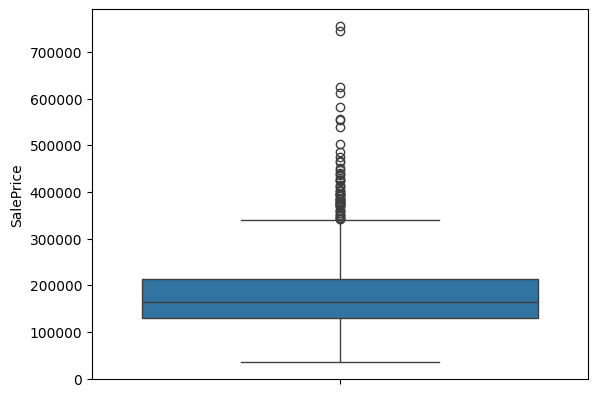

In [527]:
# Outliers treatment

plt.figure()
sns.boxplot(y='SalePrice',data=house_df)

In [528]:
numeric_col=house_df.select_dtypes(exclude=['object']).columns
numeric_col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice', 'Age'],
      dtype='object')

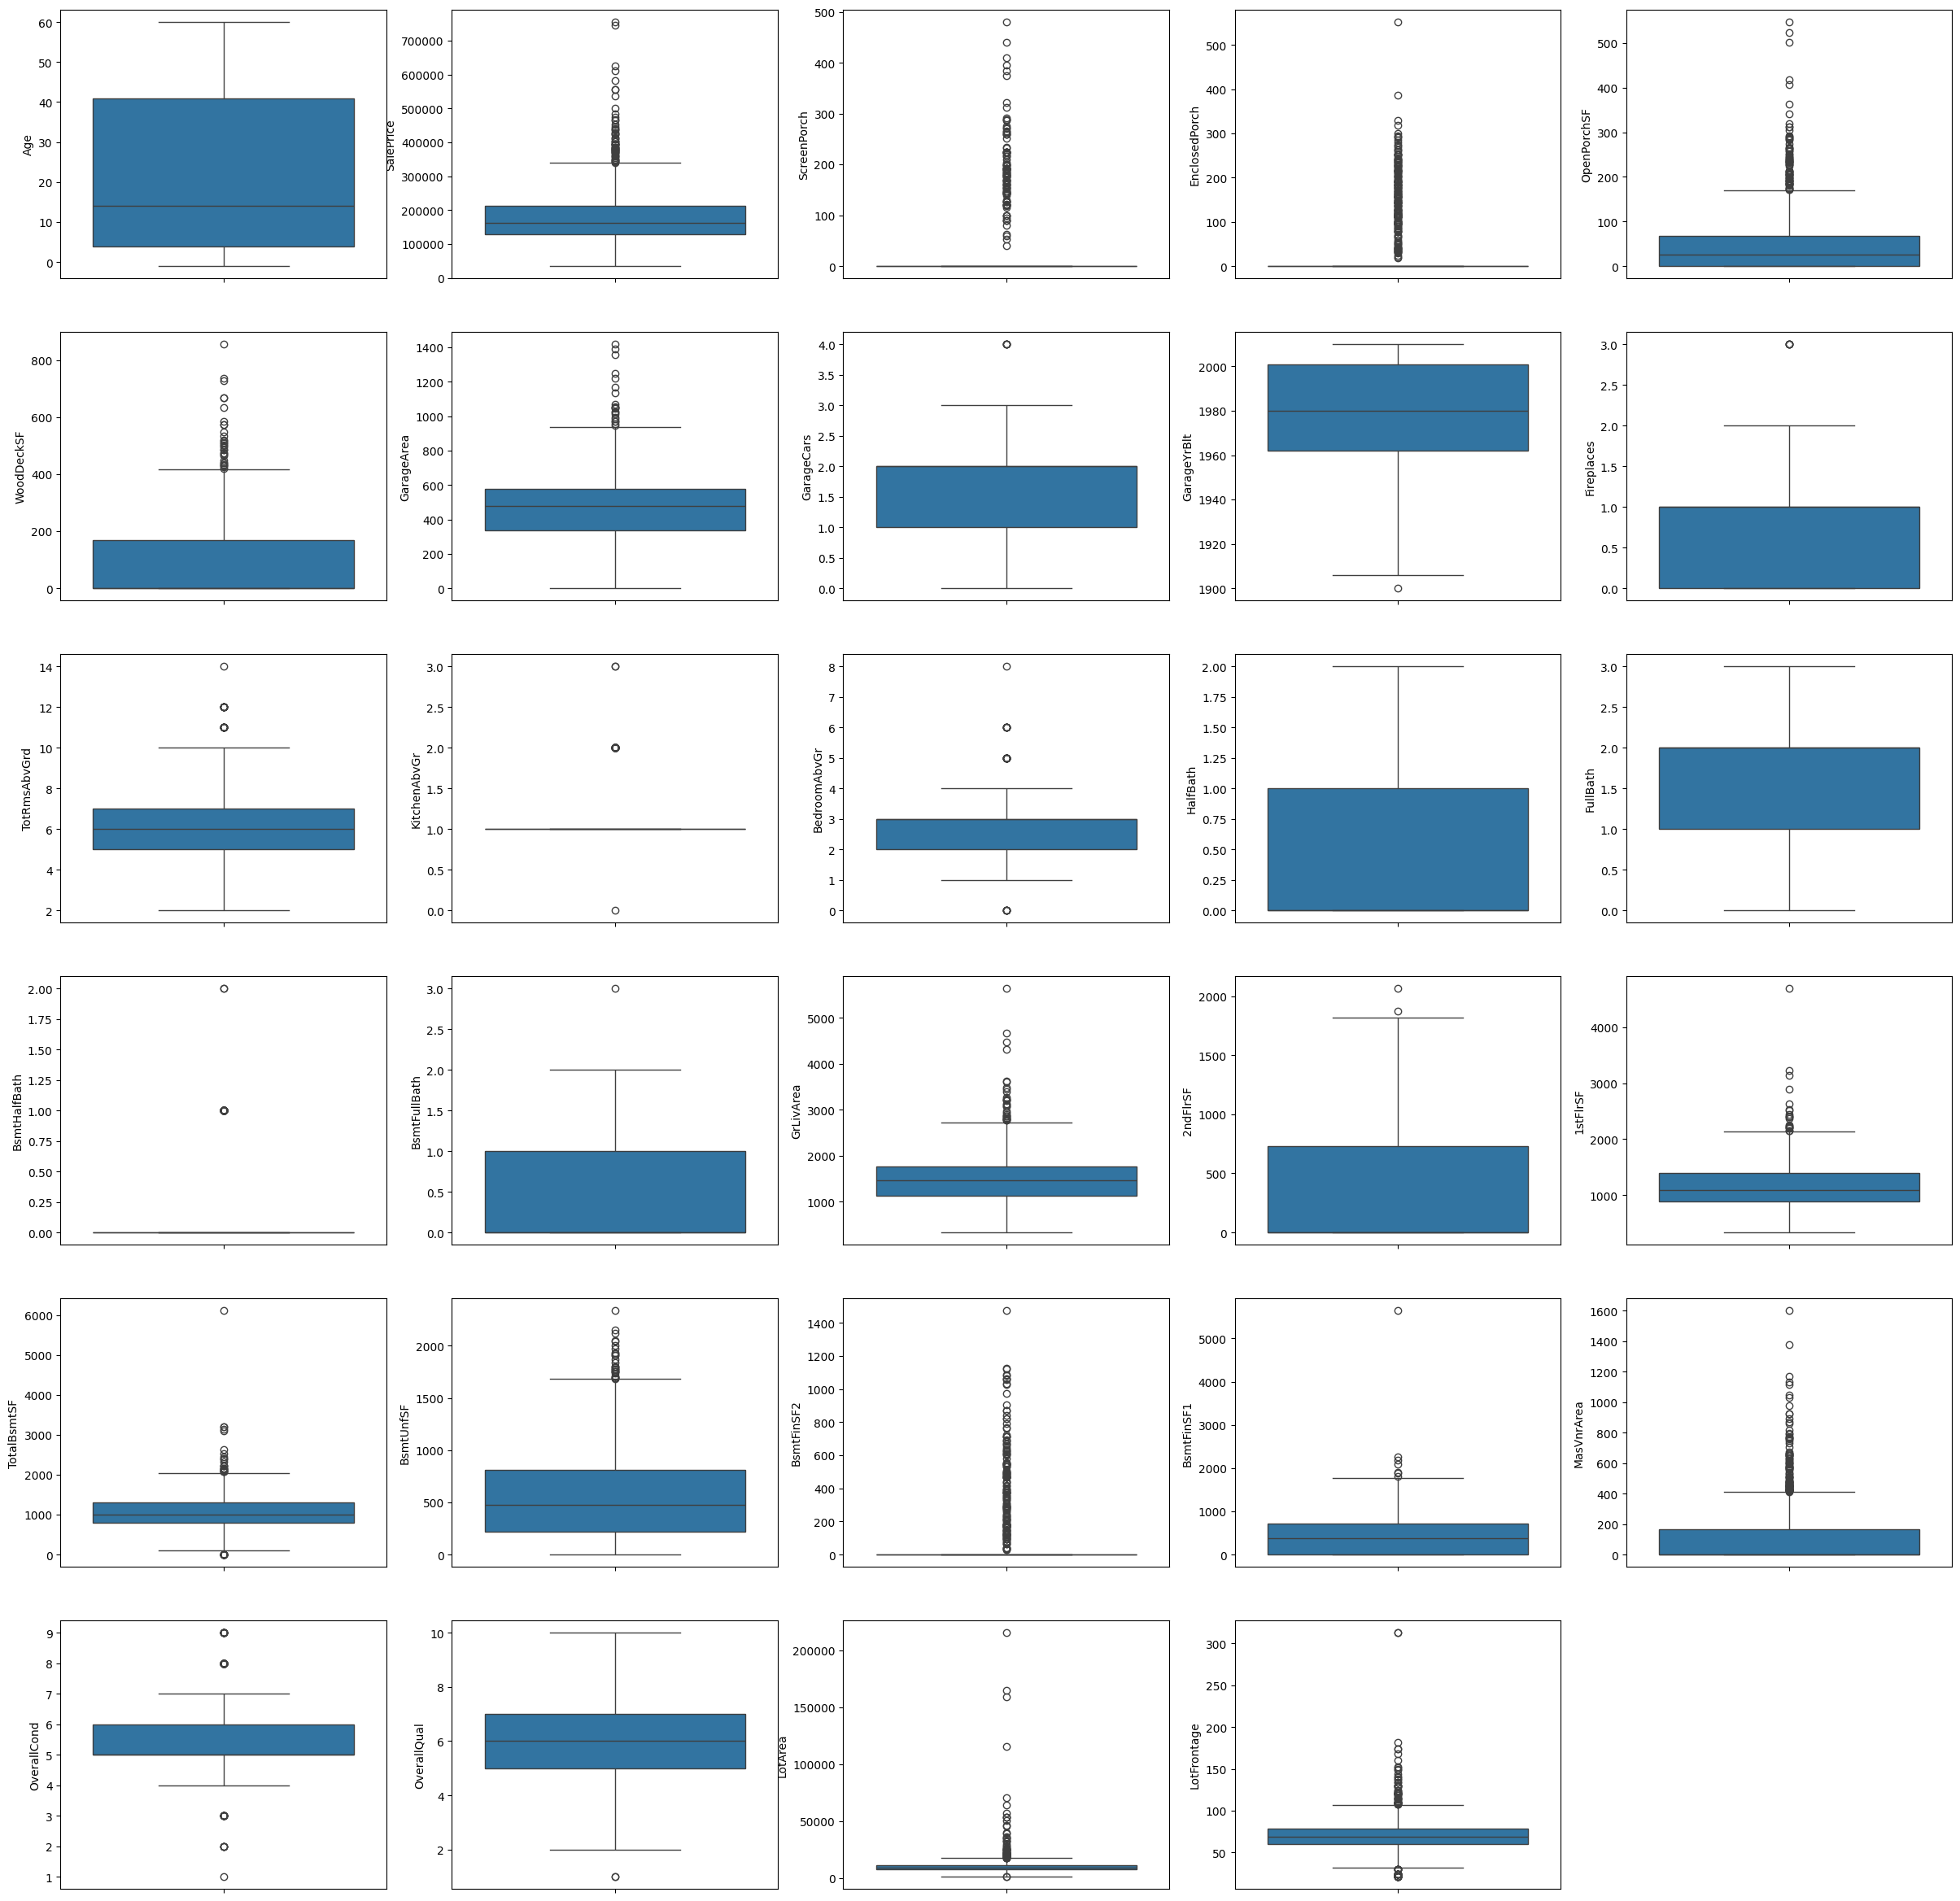

In [529]:
plt.figure(figsize=(30,30))
i=len(numeric_col)
for col in numeric_col:
  plt.subplot(round(len(numeric_col)/5),5,i)
  sns.boxplot(y=col,data=house_df)
  i=i-1
plt.show()

In [530]:
#seen some outlier in the data, hence removing the outlier with IQR
lower_quartile=house_df[numeric_col].quantile(0.05)
upper_quartile=house_df[numeric_col].quantile(0.95)

IQR=upper_quartile-lower_quartile

house_df=house_df[~((house_df[numeric_col]<(lower_quartile-1.5*IQR))|(house_df[numeric_col]>(upper_quartile + 1.5 * IQR))).any(axis=1)]

<Axes: xlabel='SalePrice', ylabel='Density'>

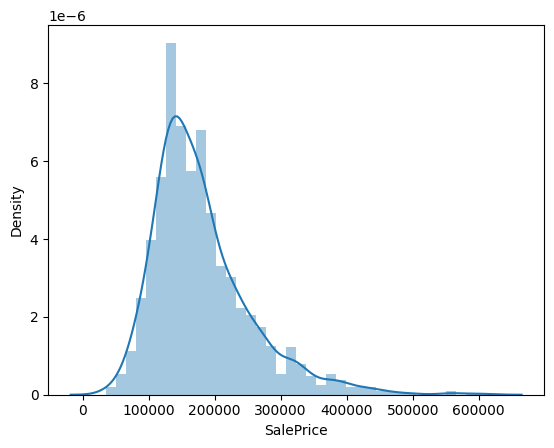

In [531]:
plt.figure()
sns.distplot(house_df['SalePrice'])

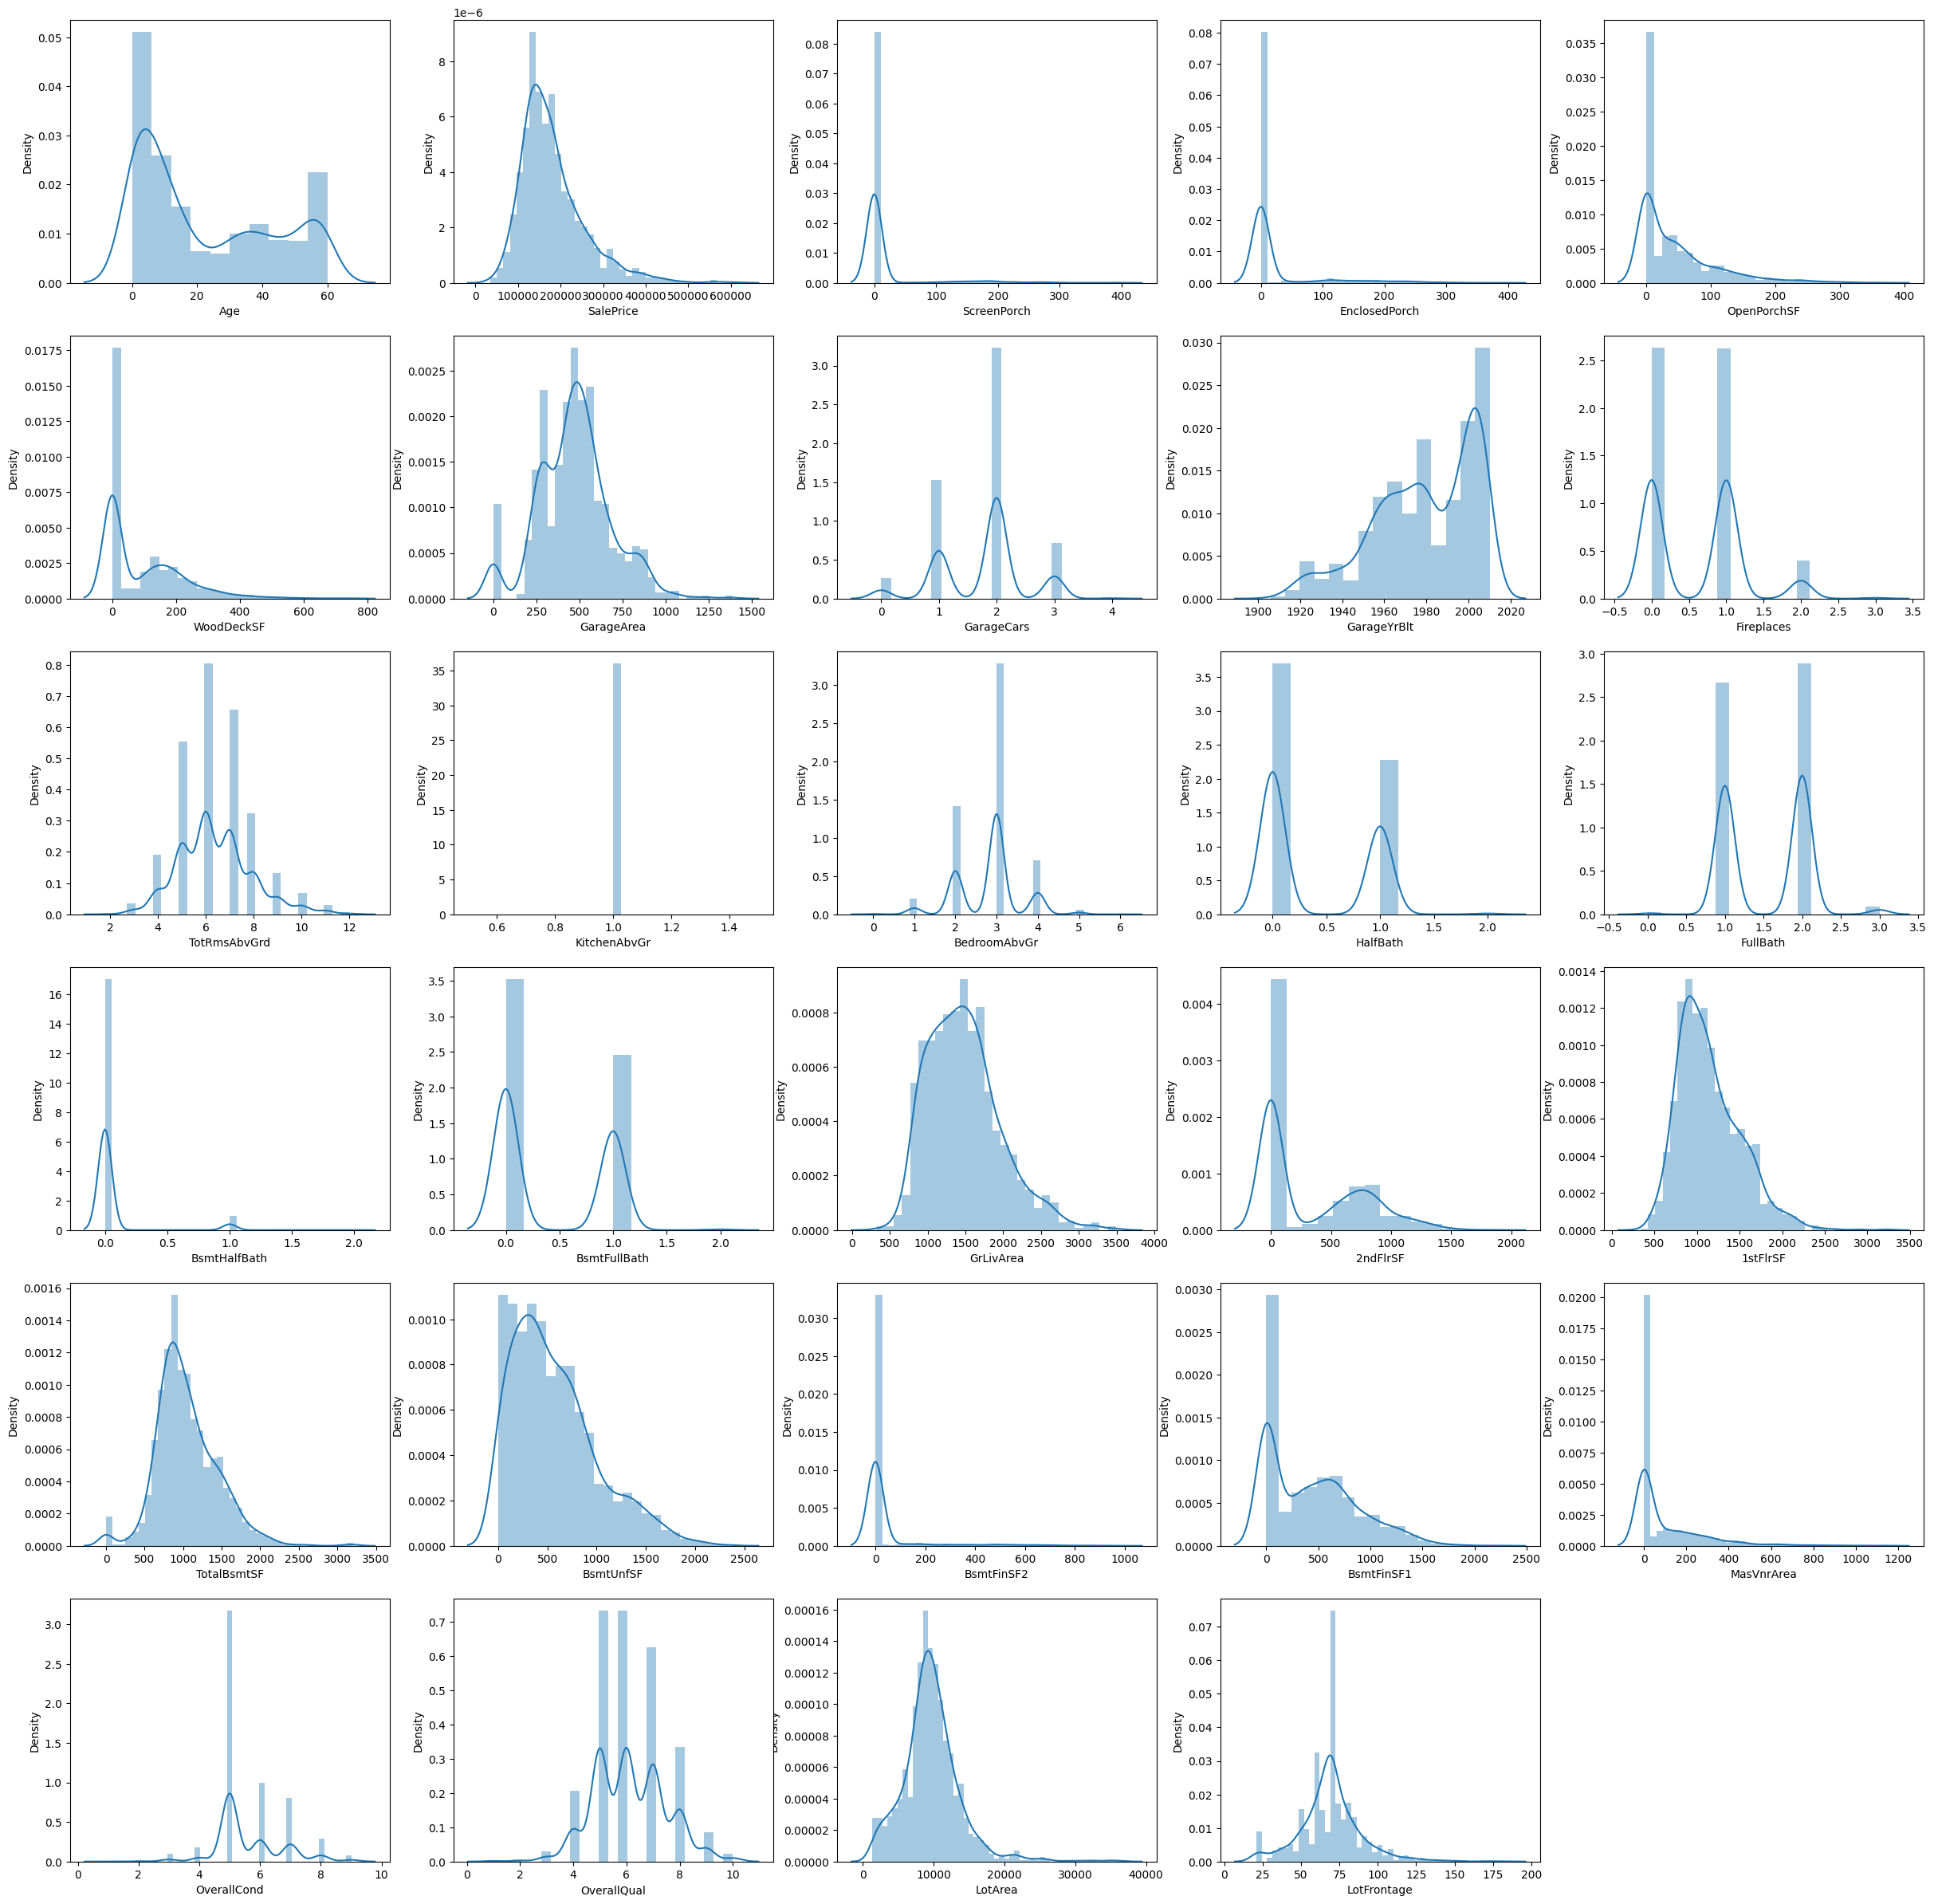

In [532]:
plt.figure(figsize=(30,30))
i=len(numeric_col)
for col in numeric_col:
  plt.subplot(round(len(numeric_col)/5),5,i)
  sns.distplot(house_df[col])
  i=i-1
plt.show()

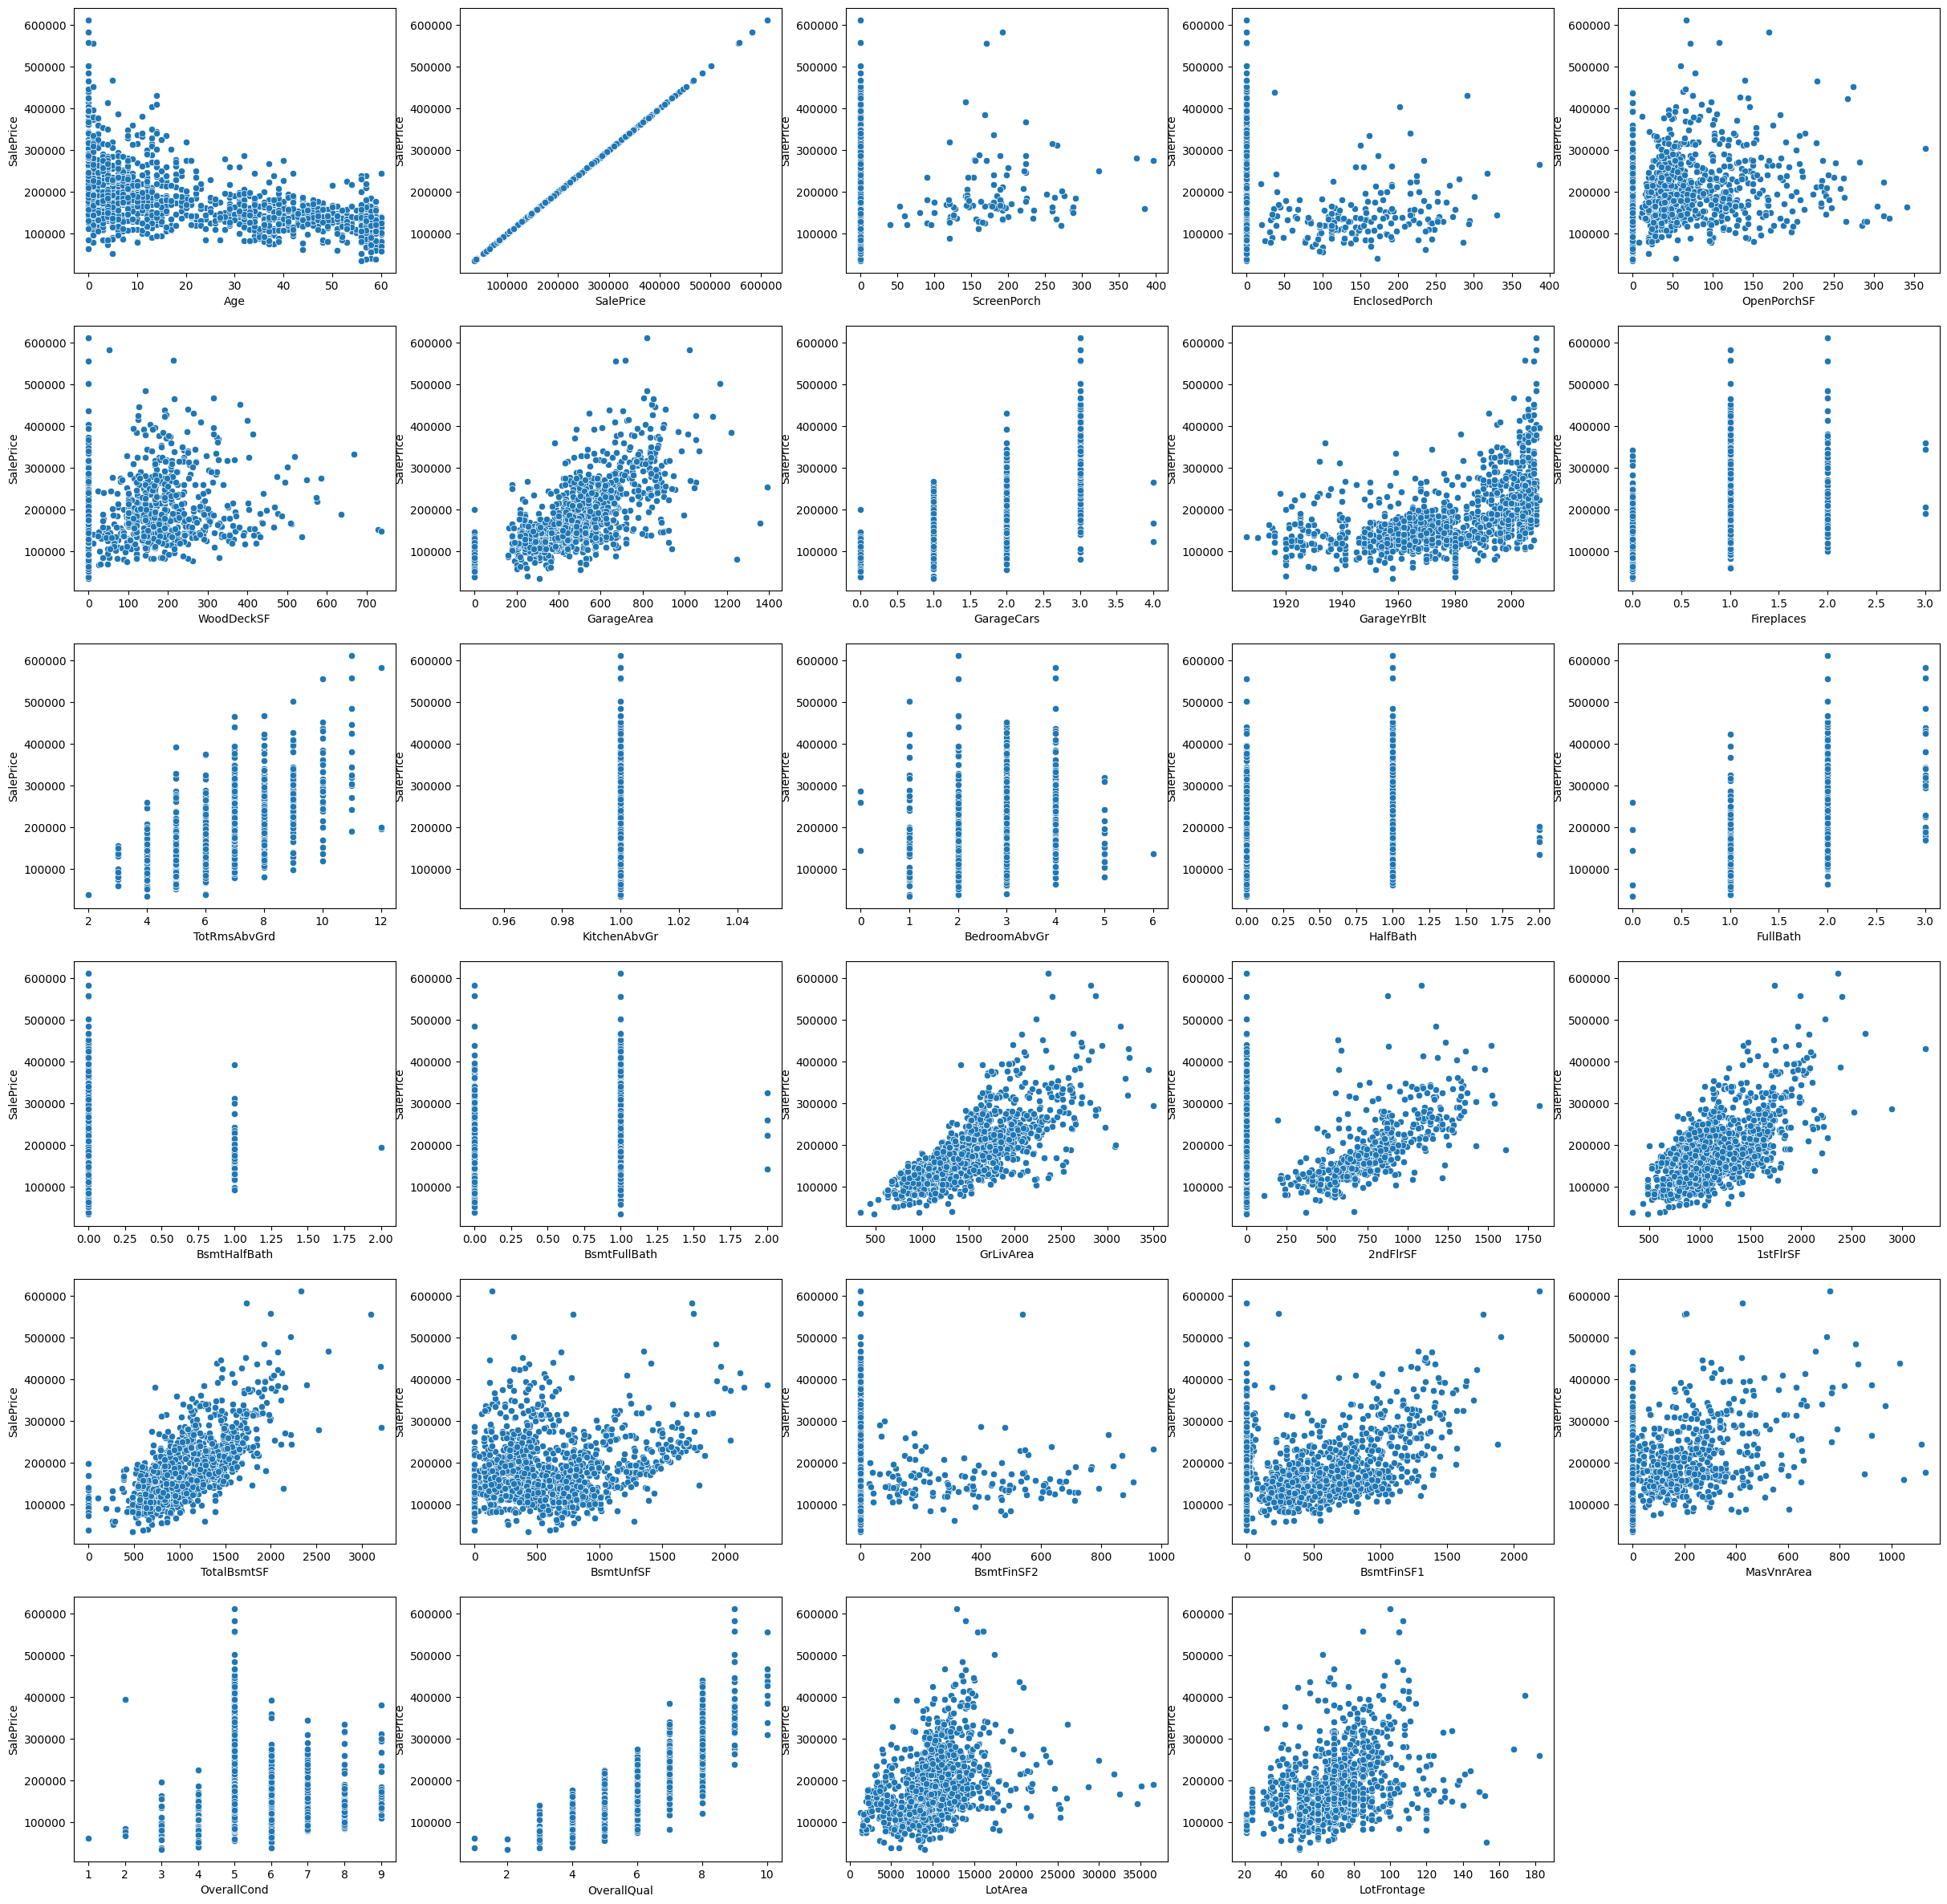

In [533]:
# Lets Visulize the how numeric varialbe with target variable (Sales Price)
plt.figure(figsize=(30,30))
i=len(numeric_col)
for col in numeric_col:
  plt.subplot(round(len(numeric_col)/5),5,i)
  sns.scatterplot(data=house_df,x=col,y='SalePrice')
  i=i-1
plt.show()


Above graphs shows the numeric variable relation with Sales Price

In [534]:
house_df['KitchenAbvGr'].astype('category').value_counts()

1    1356
Name: KitchenAbvGr, dtype: int64

In [535]:
# Due to less variance in Kitchen & Street dopping the both columns
house_df=house_df.drop(['KitchenAbvGr'],axis=1)

In [536]:
categorical_col=house_df.select_dtypes(include='object').columns
categorical_col

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

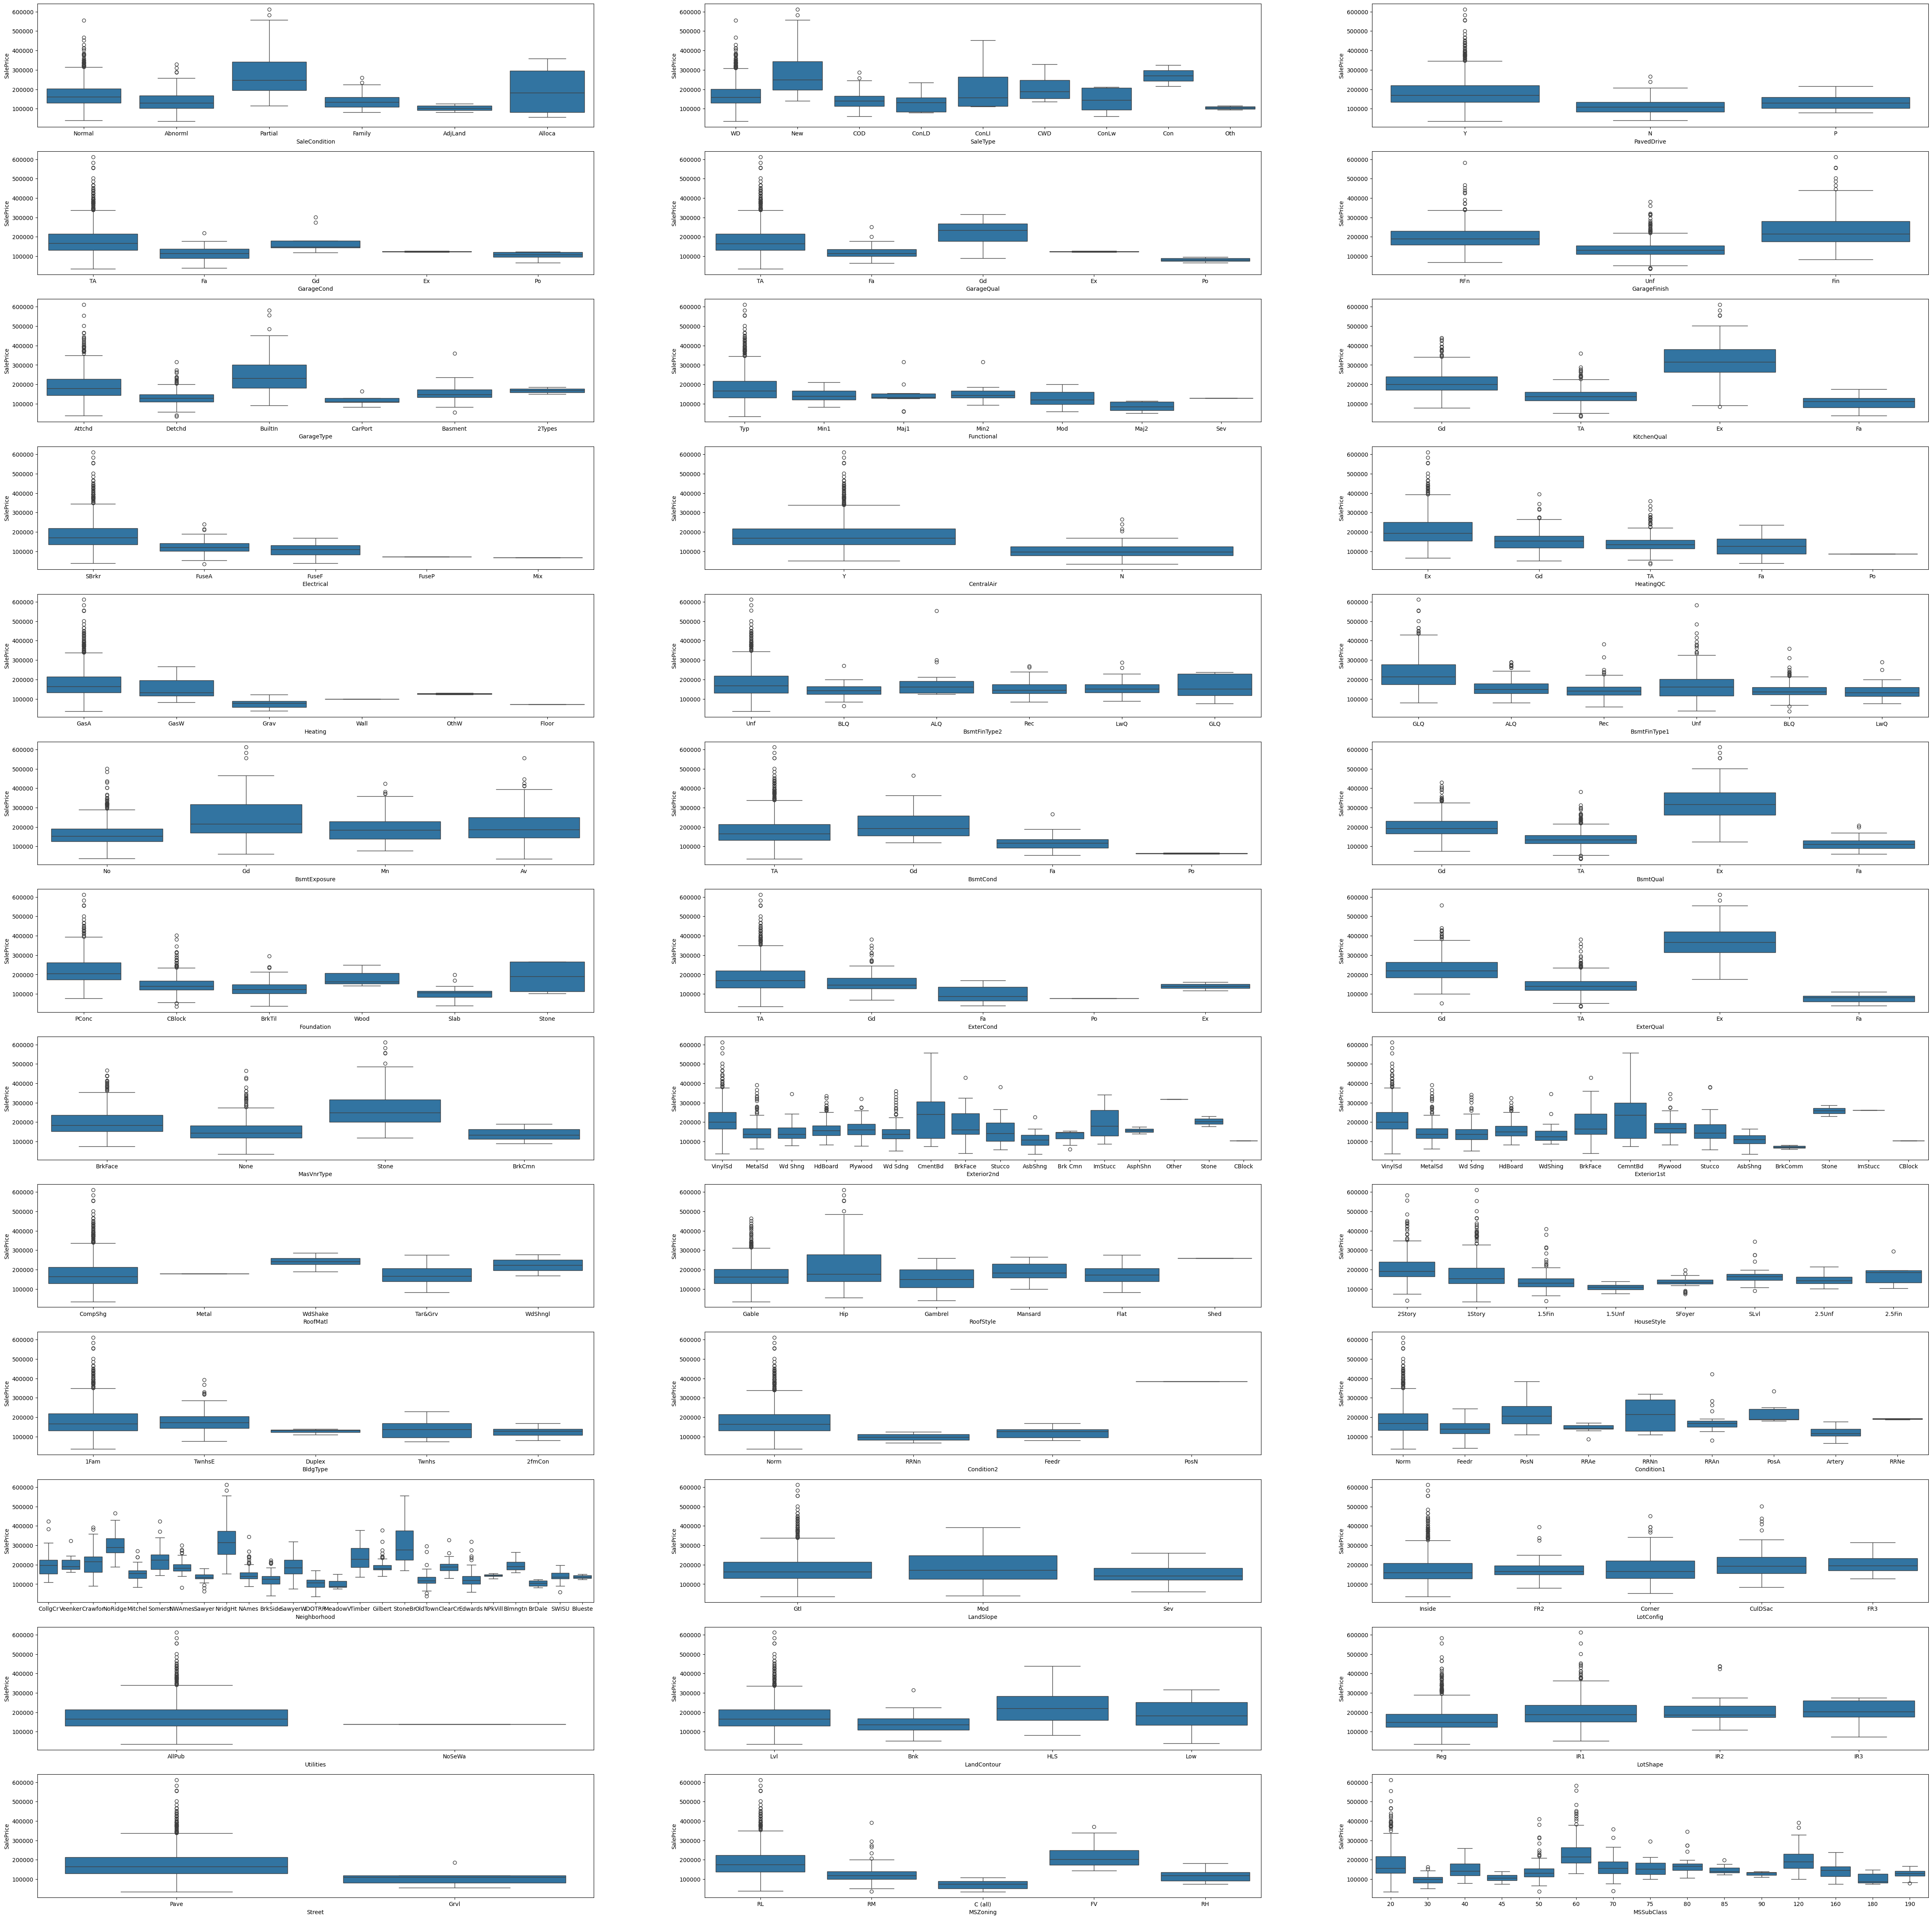

In [537]:

i=len(categorical_col)
plt.figure(figsize=(60,150))
for col in categorical_col:
  plt.subplot(32,3,i)
  sns.boxplot(x=col,y='SalePrice',data=house_df)
  i=i-1
plt.show()

From the above visulization some of usefull insights.

*   As looking in to all graphs there is no clear correlation line appears.
*   Looks like price increasing as living area increases.
*   Street type 'Pave' has more Sales Price compare to 'Grvl'.
*   Kitchen quality, Grade quality, Exterior qualirt of type excelent has higher Sale Price.



In [538]:
# Checking the correlation co-efficient
cor=house_df.corr()
cor

LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
LotFrontage       1.000000  0.526729     0.220060    -0.063988    0.165461   
LotArea           0.526729  1.000000     0.158632    -0.028698    0.136209   
OverallQual       0.220060  0.158632     1.000000    -0.134884    0.415394   
OverallCond      -0.063988 -0.028698    -0.134884     1.000000   -0.136614   
MasVnrArea        0.165461  0.136209     0.415394    -0.136614    1.000000   
BsmtFinSF1        0.135812  0.186061     0.203358    -0.037206    0.230565   
BsmtFinSF2        0.037861  0.056191    -0.109144     0.049467   -0.066045   
BsmtUnfSF         0.148522  0.074307     0.338616    -0.153006    0.123286   
TotalBsmtSF       0.321598  0.300370     0.552030    -0.190745    0.359799   
1stFlrSF          0.364081  0.389969     0.496834    -0.141005    0.343659   
2ndFlrSF          0.040980  0.088901     0.288280     0.006844    0.141948   
GrLivArea         0.313127  0.372146     0.622627    -0.101142    0.378636   
BsmtFullBath      0.056625  0.090548     0.099497    -0.044253    0.093667   
BsmtHalfBath     -0.013850  0.045868    -0.057984     0.134675    0.002023   
FullBath          0.172413  0.166575     0.613939    -0.212100    0.273787   
HalfBath          0.043189  0.078653     0.260103    -0.071504    0.195881   
BedroomAbvGr      0.261870  0.274813     0.141440     0.015941    0.096081   
TotRmsAbvGrd      0.321784  0.352086     0.499850    -0.058143    0.291369   
Fireplaces        0.227115  0.300367     0.379625    -0.050152    0.256418   
GarageYrBlt       0.080191  0.002089     0.528339    -0.337851    0.251663   
GarageCars        0.290353  0.283762     0.625290    -0.205957    0.375918   
GarageArea        0.317449  0.321187     0.564754    -0.173479    0.378886   
WoodDeckSF        0.091117  0.176458     0.225894    -0.024767    0.157370   
OpenPorchSF       0.123925  0.147972     0.318338    -0.068616    0.131969   
EnclosedPorch    -0.000104 -0.013890    -0.126046     0.081037   -0.102546   
ScreenPorch       0.053106  0.093827     0.040562     0.041587    0.058424   
SalePrice         0.360687  0.363991     0.806146    -0.121292    0.483124   
Age              -0.078484 -0.020325    -0.549472    -0.039488   -0.179471   

               BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  \
LotFrontage      0.135812    0.037861   0.148522     0.321598  0.364081  ...   
LotArea          0.186061    0.056191   0.074307     0.300370  0.389969  ...   
OverallQual      0.203358   -0.109144   0.338616     0.552030  0.496834  ...   
OverallCond     -0.037206    0.049467  -0.153006    -0.190745 -0.141005  ...   
MasVnrArea       0.230565   -0.066045   0.123286     0.359799  0.343659  ...   
BsmtFinSF1       1.000000   -0.056094  -0.544591     0.455673  0.400085  ...   
BsmtFinSF2      -0.056094    1.000000  -0.197520     0.066992  0.069755  ...   
BsmtUnfSF       -0.544591   -0.197520   1.000000     0.445108  0.355416  ...   
TotalBsmtSF      0.455673    0.066992   0.445108     1.000000  0.842941  ...   
1stFlrSF         0.400085    0.069755   0.355416     0.842941  1.000000  ...   
2ndFlrSF        -0.194420   -0.107792  -0.009912    -0.256433 -0.264256  ...   
GrLivArea        0.125712   -0.039273   0.262130     0.408877  0.523371  ...   
BsmtFullBath     0.656119    0.125248  -0.425322     0.280090  0.227260  ...   
BsmtHalfBath     0.059480    0.103296  -0.107104    -0.018194 -0.003505  ...   
FullBath         0.057865   -0.084468   0.299327     0.361385  0.376252  ...   
HalfBath        -0.039155   -0.059542  -0.039645    -0.105955 -0.148509  ...   
BedroomAbvGr    -0.113098    0.005480   0.130095     0.023318  0.085938  ...   
TotRmsAbvGrd     0.024181   -0.036024   0.250622     0.288488  0.389749  ...   
Fireplaces       0.225083    0.006519   0.076337     0.327365  0.409657  ...   
GarageYrBlt      0.143553   -0.105180   0.204492     0.342118  0.240495  ...   
GarageCars       0.226395   -0.064699   0.238122     0.481770  0.463615 

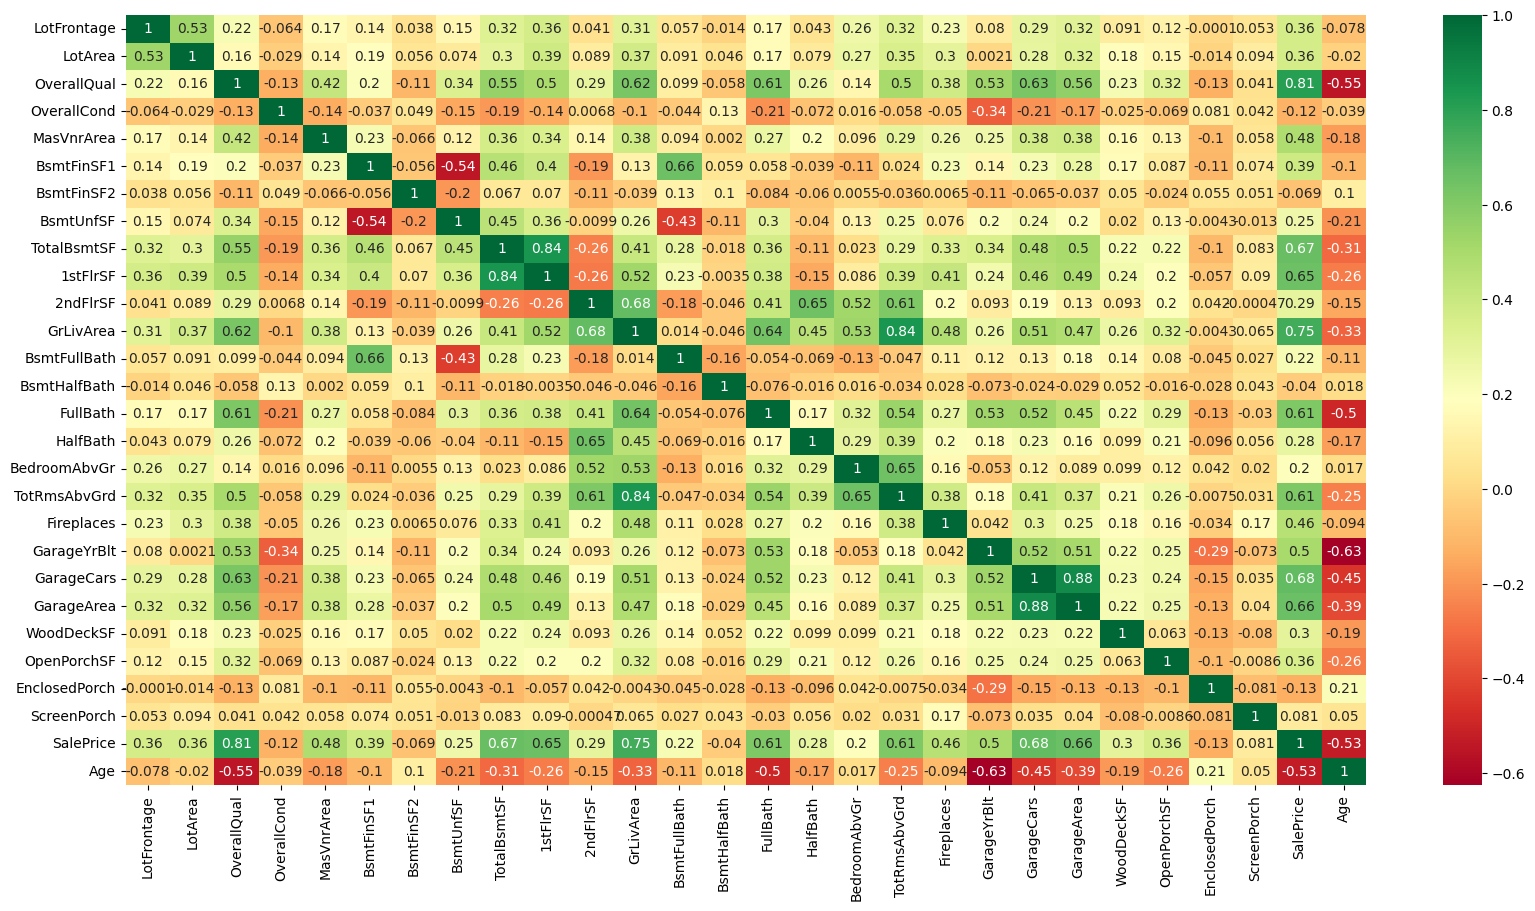

In [539]:
plt.figure(figsize=(20,10))
sns.heatmap(house_df.corr(),annot=True,cmap='RdYlGn')
plt.show()

Based on the correlation couple of insights to understand

*  SalesPrice is have high positive correlation with following variables:-
   OverallQual(0.81), GrLivArea(0.75), GarageCars(0.68), TotalBsmtSF(0.67), GarageArea(0.66), 1stFlrSF(0.65)

* SalePrice have high negative corelation with age(-0.53)





## Preparing the data for modelling

In [540]:
categorical_col=house_df.select_dtypes(include='object').columns
categorical_col

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [541]:
# Creating the dummi data set for categorical columns
categorical_dummies=pd.get_dummies(house_df[categorical_col],drop_first=True)
categorical_dummies.head()


MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0  ...               0               0             0             0   
1  ...               0               0             0             0   
2  ...               0               0             0             0   
3  ...               0               0             0             0   
4  ...               0               0             0             0   

   SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0            1                      0                     0   
1            1                      0                     0   
2            1                      0                     0   
3            1                      0                     0   
4            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 202 columns]

### Data Pre Processing

In [542]:
# Concatinating house data with Dummi data set
house_df=pd.concat([house_df,categorical_dummies],axis=1)
house_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         60       RL         65.0     8450   Pave      Reg         Lvl   
1         20       RL         80.0     9600   Pave      Reg         Lvl   
2         60       RL         68.0    11250   Pave      IR1         Lvl   
3         70       RL         60.0     9550   Pave      IR1         Lvl   
4         60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... SaleType_ConLI SaleType_ConLw  \
0    AllPub    Inside       Gtl  ...              0              0   
1    AllPub       FR2       Gtl  ...              0              0   
2    AllPub    Inside       Gtl  ...              0              0   
3    AllPub    Corner       Gtl  ...              0              0   
4    AllPub       FR2       Gtl  ...              0              0   

  SaleType_New SaleType_Oth SaleType_WD  SaleCondition_AdjLand  \
0            0            0           1                      0   
1            0            0           1                      0   
2            0            0           1                      0   
3            0            0           1                      0   
4            0            0           1                      0   

   SaleCondition_Alloca SaleCondition_Family SaleCondition_Normal  \
0                     0                    0                    1   
1                     0                    0                    1   
2                     0                    0                    1   
3                     0                    0                    0   
4                     0                    0                    1   

  SaleCondition_Partial  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 269 columns]

In [543]:
# Dropping the unwanted columns
house_df.drop(categorical_col,axis=1,inplace=True)
house_df.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0         65.0     8450            7            5       196.0         706   
1         80.0     9600            6            8         0.0         978   
2         68.0    11250            7            5       162.0         486   
3         60.0     9550            7            5         0.0         216   
4         84.0    14260            8            5       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
0           0        150          856       856  ...               0   
1           0        284         1262      1262  ...               0   
2           0        434          920       920  ...               0   
3           0        540          756       961  ...               0   
4           0        490         1145      1145  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 230 columns]

In [544]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1356 entries, 0 to 1459
Columns: 230 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(3), int64(25), uint8(202)
memory usage: 574.7 KB


## Splitting the data into Train & Test

In [545]:
df_train,df_test=train_test_split(house_df,train_size=0.7,random_state=100)

print( df_train.shape)

print( df_test.shape)

(949, 230)
(407, 230)


## Rescaling Reatures

*   MinMax scaling (convert/compress all the values between 0 to 1)


In [546]:
numeric_col=df_train.select_dtypes(include=['int64','int32','float64','float32']).columns
numeric_col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'SalePrice', 'Age'],
      dtype='object')

In [547]:
# Scaling using MinMax
scaler=MinMaxScaler()
df_train[numeric_col]=scaler.fit_transform(df_train[numeric_col])
df_test[numeric_col]=scaler.transform(df_test[numeric_col])

In [548]:
df_train.describe()

LotFrontage     LotArea  OverallQual  OverallCond  MasVnrArea  \
count   949.000000  949.000000   949.000000   949.000000  949.000000   
mean      0.314118    0.239897     0.568669     0.577582    0.092069   
std       0.130966    0.117336     0.150392     0.142235    0.150568   
min       0.000000    0.000000     0.000000     0.000000    0.000000   
25%       0.254902    0.177784     0.444444     0.500000    0.000000   
50%       0.313725    0.234350     0.555556     0.500000    0.000000   
75%       0.379085    0.294661     0.666667     0.625000    0.151570   
max       1.000000    1.000000     1.000000     1.000000    1.000000   

       BsmtFinSF1  BsmtFinSF2   BsmtUnfSF  TotalBsmtSF    1stFlrSF  ...  \
count  949.000000  949.000000  949.000000   949.000000  949.000000  ...   
mean     0.199170    0.039043    0.264070     0.335608    0.346652  ...   
std      0.192443    0.140264    0.197491     0.123864    0.154919  ...   
min      0.000000    0.000000    0.000000     0.000000    0.000000  ...   
25%      0.000000    0.000000    0.117510     0.255656    0.230535  ...   
50%      0.181444    0.000000    0.224803     0.315126    0.315789  ...   
75%      0.319470    0.000000    0.369717     0.406593    0.437582  ...   
max      1.000000    1.000000    1.000000     1.000000    1.000000  ...   

       SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count      949.000000      949.000000    949.000000    949.000000   
mean         0.001054        0.005269      0.093783      0.002107   
std          0.032461        0.072433      0.291680      0.045883   
min          0.000000        0.000000      0.000000      0.000000   
25%          0.000000        0.000000      0.000000      0.000000   
50%          0.000000        0.000000      0.000000      0.000000   
75%          0.000000        0.000000      0.000000      0.000000   
max          1.000000        1.000000      1.000000      1.000000   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count   949.000000             949.000000            949.000000   
mean      0.857745               0.002107              0.003161   
std       0.349496               0.045883              0.056165   
min       0.000000               0.000000              0.000000   
25%       1.000000               0.000000              0.000000   
50%       1.000000               0.000000              0.000000   
75%       1.000000               0.000000              0.000000   
max       1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count            949.000000            949.000000             949.000000  
mean               0.008430              0.819810               0.094837  
std                0.091475              0.384548               0.293144  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 230 columns]

## Model Bulding & Evluation

In [549]:
#Splitting the data X_train, X_test, Y_train, Y_test
y_train=df_train.pop('SalePrice')
X_train=df_train

y_test=df_test.pop('SalePrice')
X_test=df_test

print('X_train Shape =',X_train.shape,' y_train Shape =',y_train.shape )
print('X_test Shape =', X_test.shape, '  y_test_Shape =',y_test.shape )

X_train Shape = (949, 229)  y_train Shape = (949,)
X_test Shape = (407, 229)   y_test_Shape = (407,)


## Ridge & Lasso Regression

In [550]:
#List of alphas to tune the model
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge=Ridge()

# Cross Validation
folds=5

model_cv=GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

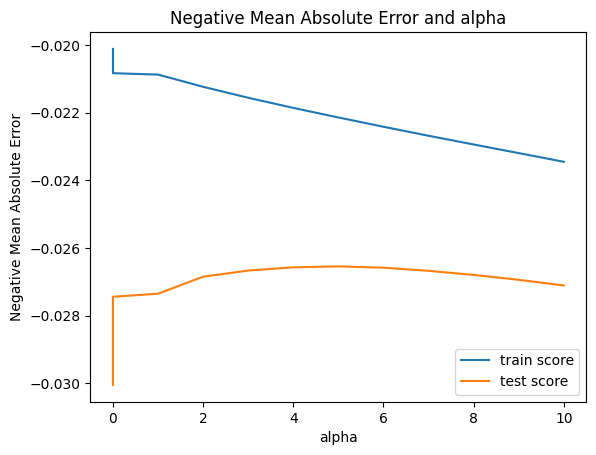

In [551]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results=cv_results[cv_results['param_alpha']<=10]

cv_results['param_alpha']=cv_results['param_alpha'].astype('int32')

plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='lower right')
plt.show()


In [552]:
print(model_cv.best_params_)

{'alpha': 5.0}


In [553]:
alpha=5
ridge=Ridge(alpha=alpha)

ridge.fit(X_train,y_train)
print(ridge.coef_)

[ 0.01576978  0.03693065  0.07763528  0.04039286  0.02477775  0.06991229
  0.00876526  0.02349919  0.06826282  0.08645591  0.04779156  0.08604821
  0.00872207 -0.01000663  0.03490397  0.02136623 -0.01063519  0.04999238
  0.02027955  0.00018542  0.03099546  0.0429309   0.00730742  0.00654257
 -0.00078099  0.01616991 -0.01703078 -0.0054425  -0.00157072  0.00286107
  0.00300459  0.00823036  0.00357126 -0.00053388 -0.00172789 -0.00577655
 -0.00219296 -0.01547418 -0.00969721 -0.00324633 -0.01185802  0.00998637
  0.00386466  0.01600443  0.00722837  0.02197752  0.00051968 -0.00570682
  0.00019891  0.0170831  -0.01614662  0.00414241 -0.00602212  0.0142558
 -0.00868028 -0.00205922 -0.00110721 -0.00145839 -0.01477185  0.00213277
  0.00563747  0.00518374 -0.00224546 -0.00823856  0.02561267 -0.01600345
 -0.02153741 -0.01616153 -0.01363658 -0.02338278 -0.02152378  0.00915998
 -0.0114934   0.03948701  0.03689853 -0.01426709 -0.0104554  -0.00974139
 -0.00122267  0.0183551   0.05385639 -0.02122198  0.

In [554]:
y_pred_train=ridge.predict(X_train)
y_pred_test=ridge.predict(X_test)

metric2=[]

r2_train_rg=r2_score(y_train,y_pred_train)
print(r2_train_rg)
metric2.append(r2_train_rg)

r2_test_rg=r2_score(y_test,y_pred_test)
print(r2_test_rg)
metric2.append(r2_test_rg)

rss1_rg=np.sum(np.square(y_train-y_pred_train))
print(rss1_rg)
metric2.append(rss1_rg)

rss2_rg=np.sum(np.square(y_test-y_pred_test))
print(rss2_rg)
metric2.append(rss2_rg)

mse_train_rg=mean_squared_error(y_train,y_pred_train)
print(mse_train_rg)
metric2.append(mse_train_rg**0.5)

mse_test_rg=mean_squared_error(y_test,y_pred_test)
print(mse_test_rg)
metric2.append(mse_test_rg**0.5)

0.9370218798225148
0.9088946100917005
1.0381112416457718
0.5890696590490172
0.001093900149257926
0.0014473455996290348


In [555]:
lasso=Lasso()

model_cv=GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

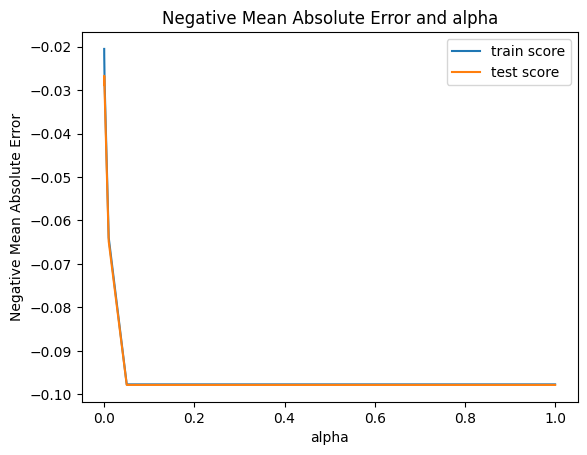

In [556]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results=cv_results[cv_results['param_alpha']<=1]

cv_results['param_alpha']=cv_results['param_alpha'].astype('float32')

plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [557]:
# Looking for the best Hyper parameter
print(model_cv.best_params_)

{'alpha': 0.0001}


From the above graph, negative Mean Absolute Error is low at alpha=0.1 but we will choose best value of alpha to balance the trade-off bwtween Bias & Variance.

In [558]:
alpha=0.0001
lasso=Lasso(alpha=alpha)

lasso.fit(X_train,y_train)
print(lasso.coef_)

[ 0.00402803  0.03981564  0.11426638  0.05546073  0.00818912  0.0646998
  0.          0.          0.11564834  0.09740381  0.04989269  0.14767764
  0.00381576 -0.00630224  0.02282022  0.01793734 -0.018717    0.03667355
  0.00736401  0.          0.01800661  0.0514005   0.00164123  0.
 -0.          0.01642975 -0.01285963 -0.         -0.          0.
  0.          0.00954263 -0.         -0.          0.         -0.
 -0.         -0.01510267 -0.00287361 -0.         -0.01367098  0.
 -0.          0.00890644  0.          0.03001843  0.         -0.
  0.00016152  0.01244488 -0.01508128  0.0031032  -0.          0.01133482
 -0.00263715 -0.         -0.         -0.         -0.          0.
  0.          0.00961289  0.          0.          0.02881997 -0.00755191
 -0.00714985 -0.00977828 -0.         -0.01677733 -0.01725441  0.
 -0.00609793  0.04518462  0.04367272 -0.01167934 -0.00684669 -0.00285252
  0.00180109  0.02802973  0.06907072 -0.00944947  0.00291308  0.
  0.0130396  -0.          0.00478471 -0.013

In [559]:
y_pred_train=lasso.predict(X_train)
y_pred_test=lasso.predict(X_test)

metric3=[]

r2_train_lso=r2_score(y_train,y_pred_train)
print(r2_train_lso)
metric3.append(r2_train_lso)

r2_test_lso=r2_score(y_test,y_pred_test)
print(r2_test_lso)
metric3.append(r2_test_lso)

rss1_lso=np.sum(np.square(y_train-y_pred_train))
print(rss1_lso)
metric3.append(rss1_lso)

rss2_lso=np.sum(np.square(y_test-y_pred_test))
print(rss2_lso)
metric3.append(rss2_lso)

mse_train_lso=mean_squared_error(y_train,y_pred_train)
print(mse_train_lso)
metric3.append(mse_train_lso**0.5)

mse_test_lso=mean_squared_error(y_test,y_pred_test)
print(mse_test_lso)
metric3.append(mse_test_lso**0.5)

0.9375368412448855
0.90715092773859
1.0296227818430614
0.6003439686180829
0.0010849555130063872
0.0014750466059412356


In [560]:
rg_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','MSE (Train)','MSE (Test)'],'Ridge Regression': metric2}

rg_metric = pd.DataFrame(rg_table ,columns = ['Metric', 'Ridge Regression'] )

ls_metric = pd.Series(metric3, name = 'Lasso Regression')
rg_ls_metric = pd.concat([rg_metric, ls_metric], axis = 1)

rg_ls_metric

Metric  Ridge Regression  Lasso Regression
0  R2 Score (Train)          0.937022          0.937537
1   R2 Score (Test)          0.908895          0.907151
2       RSS (Train)          1.038111          1.029623
3        RSS (Test)          0.589070          0.600344
4       MSE (Train)          0.033074          0.032939
5        MSE (Test)          0.038044          0.038406

**Observation:-**

The Ridge regression is better in terms of R2 score of Train & Test, but lasso brings & makes zero value to insignificant features, enabling us to choose the predictive variable.

# Model Evluation

In [561]:
ridge_pred=ridge.predict(X_test)

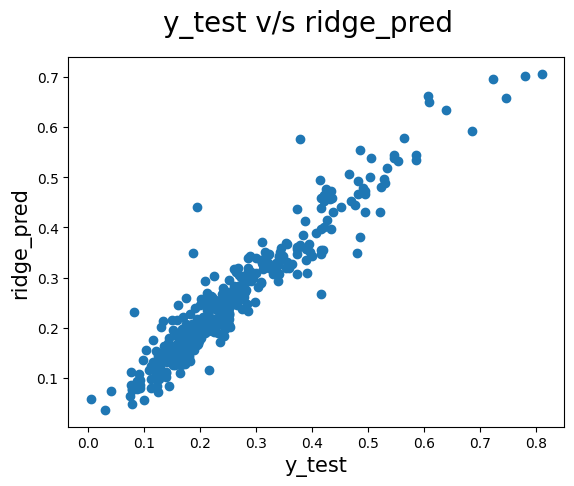

In [562]:
# Plotting the y_test & predict to understand the spread of ridge regression
fig=plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test v/s ridge_pred',fontsize=20 )
plt.xlabel('y_test',fontsize=15)
plt.ylabel('ridge_pred',fontsize=15)
plt.show()

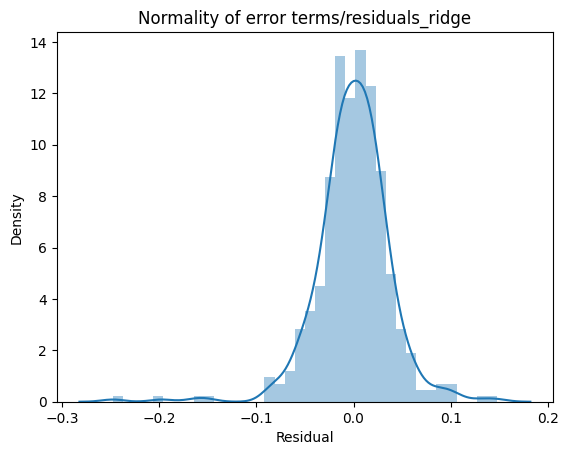

In [563]:
# Distribution of errors
y_res=y_test-ridge_pred
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals_ridge')
plt.xlabel("Residual")
plt.show()

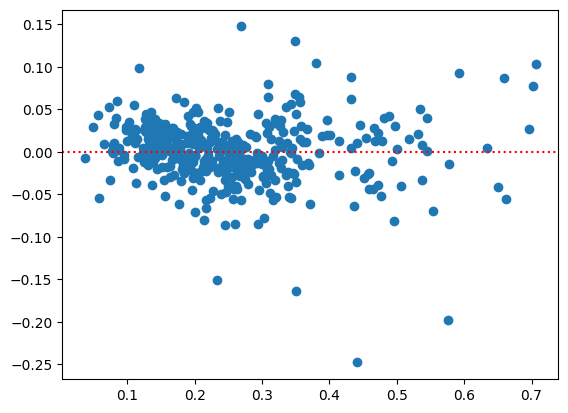

In [564]:
# Scatter plot of the predicted values on the x-axis and the residuals on the y-axis
plt.scatter(ridge_pred , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.show()

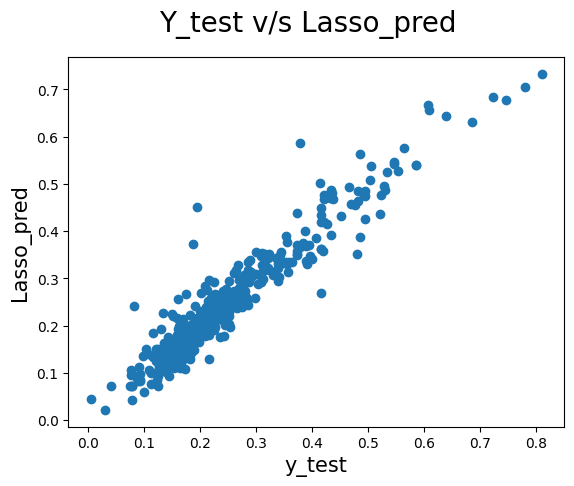

In [565]:
# Plotting the y_test & predict to understand the spread of ridge regression
lasso_pred=lasso.predict(X_test)

fig=plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('Y_test v/s Lasso_pred',fontsize=20 )
plt.xlabel('y_test',fontsize=15)
plt.ylabel('Lasso_pred',fontsize=15)
plt.show()

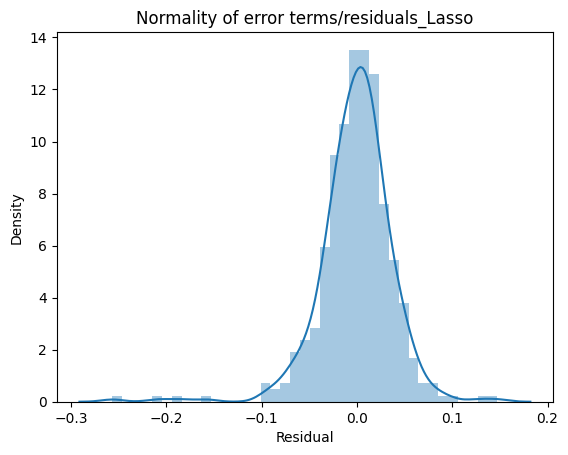

In [566]:
y_res=y_test-lasso_pred
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals_Lasso')
plt.xlabel("Residual")
plt.show()

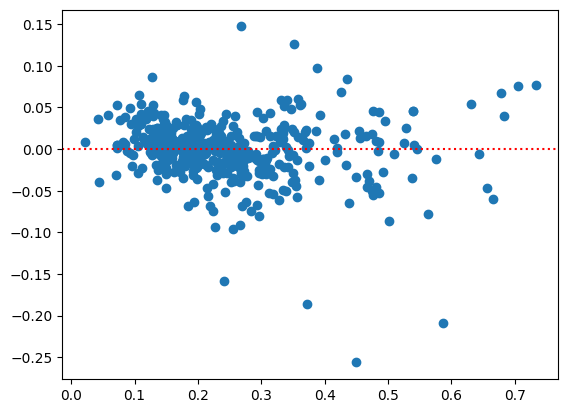

In [567]:
# Scatter plot of the predicted values on the x-axis and the residuals on the y-axis
plt.scatter( lasso_pred , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.show()

## Lets observe the Co-efficients which are the variables

In [568]:
betas=pd.DataFrame(index=df_train.columns)
betas.rows=df_train.columns

betas['Ridge']=ridge.coef_
betas['Ridge_abs']=abs(ridge.coef_)
betas['Lasso']=lasso.coef_
betas['Lasso_abs']=abs(lasso.coef_)
print(betas.sort_values(by=['Ridge_abs'], ascending=False).head(10))
print('\n')
print(betas.sort_values(by=['Lasso_abs'], ascending=False).head(10))

                         Ridge  Ridge_abs     Lasso  Lasso_abs
1stFlrSF              0.086456   0.086456  0.097404   0.097404
GrLivArea             0.086048   0.086048  0.147678   0.147678
OverallQual           0.077635   0.077635  0.114266   0.114266
BsmtFinSF1            0.069912   0.069912  0.064700   0.064700
TotalBsmtSF           0.068263   0.068263  0.115648   0.115648
Neighborhood_StoneBr  0.053856   0.053856  0.069071   0.069071
TotRmsAbvGrd          0.049992   0.049992  0.036674   0.036674
2ndFlrSF              0.047792   0.047792  0.049893   0.049893
GarageArea            0.042931   0.042931  0.051401   0.051401
OverallCond           0.040393   0.040393  0.055461   0.055461


                         Ridge  Ridge_abs     Lasso  Lasso_abs
GrLivArea             0.086048   0.086048  0.147678   0.147678
TotalBsmtSF           0.068263   0.068263  0.115648   0.115648
OverallQual           0.077635   0.077635  0.114266   0.114266
1stFlrSF              0.086456   0.086456  0.097404  

## The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.



Also, determine the optimal value of lambda for ridge and lasso regression.



**Q1 Which variables are significant in predicting the price of a house**

Suggestion is that to keep a check on those predictor affecting the Sales price of the house. Higher the value of positive Coefficient indicates a higher sale value and The higher value of negative coefficient indicates decrease in value

Below mentioned variables are significant in predicting the price

*   GrLivArea -------------------------Above grade (ground) living area square feet

*   TotalBsmtSF --------------------Total square feet of basement area
*   OverallQual -----------------------Rates the overall material and finish of the house
*   1stFlrSF -----------------------------First Floor square feet
*   Neighborhood_StoneBr -----Physical locations within Ames city limits_StoneBr
*   BsmtFinSF1 -----------------Type 1 finished square feet
*   OverallCond ----------------Rates the overall condition of the house
*   2ndFlrSF -------------------Second floor square feet
*   GarageArea -----------------Size of garage in square feet
*   Neighborhood_NoRidge--------Physical locations within Ames city limits


**Q2. How well those variables describe the price of a house.**

Ans:- These variables/fields indicates the linear relation with price  by which company can imporove sales. For instance focusing on investing in properties with a potential for high salesprice in future could be a strategic approch.

                      Ridge Regression     Lasso Regression
R2 Score(Train)-------------    0.937    -----------------  0.938

R2 Score(Test) -------------    0.908    -----------------  0.907




In [569]:
rg_ls_metric

Metric  Ridge Regression  Lasso Regression
0  R2 Score (Train)          0.937022          0.937537
1   R2 Score (Test)          0.908895          0.907151
2       RSS (Train)          1.038111          1.029623
3        RSS (Test)          0.589070          0.600344
4       MSE (Train)          0.033074          0.032939
5        MSE (Test)          0.038044          0.038406

In [570]:
# Coefficient of each variable
betas.sort_values(by=['Lasso'], ascending=False)

Ridge  Ridge_abs     Lasso  Lasso_abs
GrLivArea              0.086048   0.086048  0.147678   0.147678
TotalBsmtSF            0.068263   0.068263  0.115648   0.115648
OverallQual            0.077635   0.077635  0.114266   0.114266
1stFlrSF               0.086456   0.086456  0.097404   0.097404
Neighborhood_StoneBr   0.053856   0.053856  0.069071   0.069071
BsmtFinSF1             0.069912   0.069912  0.064700   0.064700
OverallCond            0.040393   0.040393  0.055461   0.055461
GarageArea             0.042931   0.042931  0.051401   0.051401
2ndFlrSF               0.047792   0.047792  0.049893   0.049893
Neighborhood_NoRidge   0.039487   0.039487  0.045185   0.045185
Neighborhood_NridgHt   0.036899   0.036899  0.043673   0.043673
LotArea                0.036931   0.036931  0.039816   0.039816
Functional_Typ         0.029835   0.029835  0.037015   0.037015
TotRmsAbvGrd           0.049992   0.049992  0.036674   0.036674
Street_Pave            0.021978   0.021978  0.030018   0.030018
BsmtExposure_Gd        0.031597   0.031597  0.029396   0.029396
Neighborhood_Crawfor   0.025613   0.025613  0.028820   0.028820
Neighborhood_Somerst   0.018355   0.018355  0.028030   0.028030
Exterior1st_BrkFace    0.024949   0.024949  0.023733   0.023733
FullBath               0.034904   0.034904  0.022820   0.022820
SaleCondition_Partial  0.017529   0.017529  0.019801   0.019801
GarageType_BuiltIn     0.022904   0.022904  0.019105   0.019105
GarageCars             0.030995   0.030995  0.018007   0.018007
HalfBath               0.021366   0.021366  0.017937   0.017937
ScreenPorch            0.016170   0.016170  0.016430   0.016430
SaleType_CWD           0.019210   0.019210  0.016371   0.016371
SaleType_New           0.013991   0.013991  0.015566   0.015566
SaleCondition_Normal   0.013191   0.013191  0.014673   0.014673
Condition1_Norm        0.015396   0.015396  0.013040   0.013040
LandContour_HLS        0.017083   0.017083  0.012445   0.012445
Foundation_Slab        0.006318   0.006318  0.011590   0.011590
LotConfig_CulDSac      0.014256   0.014256  0.011335   0.011335
Exterior2nd_Wd Sdng    0.013115   0.013115  0.011183   0.011183
Foundation_PConc       0.012545   0.012545  0.010468   0.010468
Neighborhood_BrkSide   0.005184   0.005184  0.009613   0.009613
MSSubClass_60          0.008230   0.008230  0.009543   0.009543
Functional_Min2        0.006808   0.006808  0.009537   0.009537
Exterior2nd_VinylSd    0.011418   0.011418  0.009015   0.009015
MSZoning_RL            0.016004   0.016004  0.008906   0.008906
Electrical_FuseF       0.005879   0.005879  0.008793   0.008793
MasVnrArea             0.024778   0.024778  0.008189   0.008189
Fireplaces             0.020280   0.020280  0.007364   0.007364
PavedDrive_Y           0.008755   0.008755  0.006622   0.006622
Foundation_CBlock      0.007426   0.007426  0.006318   0.006318
BsmtFinType1_GLQ       0.010015   0.010015  0.006119   0.006119
Exterior2nd_CmentBd    0.009588   0.009588  0.006059   0.006059
HouseStyle_1Story      0.003189   0.003189  0.005770   0.005770
Exterior1st_Stucco     0.012662   0.012662  0.005058   0.005058
Condition1_PosN        0.013483   0.013483  0.004785   0.004785
BsmtCond_TA            0.004147   0.004147  0.004049   0.004049
LotFrontage            0.015770   0.015770  0.004028   0.004028
BsmtFullBath           0.008722   0.008722  0.003816   0.003816
LandContour_Lvl        0.004142   0.004142  0.003103   0.003103
Neighborhood_Veenker   0.008954   0.008954  0.002913   0.002913
GarageType_Attchd      0.003332   0.003332  0.002670   0.002670
MasVnrType_Stone       0.013391   0.013391  0.002447   0.002447
RoofStyle_Hip          0.002936   0.002936  0.001866   0.001866
Exterior2nd_MetalSd    0.000677   0.000677  0.001848   0.001848
Neighborhood_SawyerW  -0.001223   0.001223  0.001801   0.001801
WoodDeckSF             0.007307   0.007307  0.001641   0.001641
MasVnrType_None        0.009672   0.009672  0.000793   0.000793
BsmtFinType2_LwQ       0.001558   0.001558  0.000509   0.0

**Optimal value of lambda for ridge and lasso regression.**

Ridge >>>>>>>>> 4

Lasso >>>>>>>>> 0.0001



---



## **Part II**

**Question 1**

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Ans:-
*  For Ridge regression alpha is 4 and now making it to 8.
*  Simillerly for Lasso 0.0001 to 0.0002.


In [571]:
# Ridge Regrassion with making Double Alpha
alpha=10
ridge_double=Ridge(alpha=alpha)

ridge_double.fit(X_train,y_train)

Ridge(alpha=10)

In [572]:
y_pred_train=ridge_double.predict(X_train)
y_pred_test=ridge_double.predict(X_test)

metric4=[]

r2_train_rg=r2_score(y_train,y_pred_train)
print(r2_train_rg)
metric4.append(r2_train_rg)

r2_test_rg=r2_score(y_test,y_pred_test)
print(r2_test_rg)
metric4.append(r2_test_rg)

rss1_rg=np.sum(np.square(y_train-y_pred_train))
print(rss1_rg)
metric4.append(rss1_rg)

rss2_rg=np.sum(np.square(y_test-y_pred_test))
print(rss2_rg)
metric4.append(rss2_rg)

mse_train_rg=mean_squared_error(y_train,y_pred_train)
print(mse_train_rg)
metric4.append(mse_train_rg**0.5)

mse_test_rg=mean_squared_error(y_test,y_pred_test)
print(mse_test_rg)
metric4.append(mse_test_rg**0.5)

0.9298145305652415
0.9082896667877907
1.1569148875049495
0.5929811043118809
0.0012190883956848784
0.0014569560302503217


In [573]:
# Changing Alpha for Lasso
alpha=0.0002
lasso_double=Lasso(alpha=alpha)

lasso_double.fit(X_train,y_train)

Lasso(alpha=0.0002)

In [574]:
print(lasso_double.coef_)

[ 2.60568437e-03  2.65737570e-02  1.23805197e-01  4.85129683e-02
  7.47188064e-03  6.37977811e-02  0.00000000e+00  0.00000000e+00
  1.09625671e-01  5.09213543e-02  0.00000000e+00  2.28369054e-01
  3.37146474e-03 -0.00000000e+00  1.45394069e-02  1.51263329e-02
 -0.00000000e+00  2.12241632e-02  8.74318270e-03  0.00000000e+00
  1.87697949e-02  5.01080690e-02  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  1.19018124e-02 -1.39214978e-02 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  1.23194836e-02
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -1.27348630e-02 -1.65484742e-03 -0.00000000e+00
 -3.21932165e-03  0.00000000e+00 -0.00000000e+00  1.15229782e-02
 -0.00000000e+00  1.30165174e-02  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  9.23833529e-03 -3.52426608e-03  2.54152185e-03
 -0.00000000e+00  1.14501558e-02 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  9.42233

In [575]:
y_pred_train=lasso_double.predict(X_train)
y_pred_test=lasso_double.predict(X_test)

metric5=[]

r2_train_lso=r2_score(y_train,y_pred_train)
print(r2_train_lso)
metric5.append(r2_train_lso)

r2_test_lso=r2_score(y_test,y_pred_test)
print(r2_test_lso)
metric5.append(r2_test_lso)

rss1_lso=np.sum(np.square(y_train-y_pred_train))
print(rss1_lso)
metric5.append(rss1_lso)

rss2_lso=np.sum(np.square(y_test-y_pred_test))
print(rss2_lso)
metric5.append(rss2_lso)

mse_train_lso=mean_squared_error(y_train,y_pred_train)
print(mse_train_lso)
metric5.append(mse_train_lso**0.5)

mse_test_lso=mean_squared_error(y_test,y_pred_test)
print(mse_test_lso)
metric5.append(mse_test_lso**0.5)

0.9308966889667996
0.9065484565749895
1.1390769336452151
0.6042394295044937
0.001200291816275253
0.001484617762910304


In [576]:
rg_metric_double = pd.Series(metric4, name = 'Ridge Regression_Double')

ls_metric_double = pd.Series(metric5, name = 'Lasso Regression_Double')

rg_ls_metric = pd.concat([rg_metric,rg_metric_double, ls_metric,ls_metric_double], axis = 1)

rg_ls_metric

Metric  Ridge Regression  Ridge Regression_Double  \
0  R2 Score (Train)          0.937022                 0.929815   
1   R2 Score (Test)          0.908895                 0.908290   
2       RSS (Train)          1.038111                 1.156915   
3        RSS (Test)          0.589070                 0.592981   
4       MSE (Train)          0.033074                 0.034915   
5        MSE (Test)          0.038044                 0.038170   

   Lasso Regression  Lasso Regression_Double  
0          0.937537                 0.930897  
1          0.907151                 0.906548  
2          1.029623                 1.139077  
3          0.600344                 0.604239  
4          0.032939                 0.034645  
5          0.038406                 0.038531

* R2score on training data has decresed and bit little increased on testing data for Ridge Regression
* In Lasso Regression, R2score bit reduce in both train & Test

In [577]:
#Taking the Absolute value of co-efficient because sign of the co-efficient

betas=pd.DataFrame(index=df_train.columns)
betas.rows=df_train.columns

betas['Ridge']=ridge.coef_
betas['Ridge_abs']=abs(ridge.coef_)
betas['Lasso']=lasso.coef_
betas['Lasso_abs']=abs(lasso.coef_)
betas['Ridge_double']=ridge_double.coef_
betas['Ridge_double_abs']=abs(ridge_double.coef_)
betas['Lasso_double']=lasso_double.coef_
betas['Lasso_double_abs']=abs(lasso_double.coef_)

print(betas.sort_values(by=['Ridge_double_abs'], ascending=False).head(10))

print(betas.sort_values(by=['Lasso_double_abs'], ascending=False).head(10))

                         Ridge  Ridge_abs     Lasso  Lasso_abs  Ridge_double  \
1stFlrSF              0.086456   0.086456  0.097404   0.097404      0.075220   
GrLivArea             0.086048   0.086048  0.147678   0.147678      0.074364   
OverallQual           0.077635   0.077635  0.114266   0.114266      0.066803   
TotalBsmtSF           0.068263   0.068263  0.115648   0.115648      0.058992   
BsmtFinSF1            0.069912   0.069912  0.064700   0.064700      0.058198   
TotRmsAbvGrd          0.049992   0.049992  0.036674   0.036674      0.047620   
Neighborhood_StoneBr  0.053856   0.053856  0.069071   0.069071      0.042956   
GarageArea            0.042931   0.042931  0.051401   0.051401      0.039452   
2ndFlrSF              0.047792   0.047792  0.049893   0.049893      0.038431   
Neighborhood_NoRidge  0.039487   0.039487  0.045185   0.045185      0.036004   

                      Ridge_double_abs  Lasso_double  Lasso_double_abs  
1stFlrSF                      0.075220      0.

As alpha value increases predicters co-efficent values increase in case of lasso & decrease in case of ridge.

Below are the list of predictor after change lamda value in case of Lasso.


GrLivArea

OverallQual

TotalBsmtSF

BsmtFinSF1

Neighborhood_StoneBr

1stFlrSF

GarageArea

OverallCond

Neighborhood_NridgHt

Neighborhood_NoRidge




---



**Question 2**

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

Ans:-
  The Ridge regression is better in terms of R2 score of Train & Test, but lasso brings & makes zero value to insignificant features, enabling us to choose the predictive variable.



---

**Question 3**

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [578]:
X_train.head()

LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
1375     0.444444  0.282385     0.777778          0.5    0.071749    0.000000   
432      0.019608  0.012752     0.444444          0.5    0.337220    0.215265   
595      0.313725  0.291630     0.777778          0.5    0.213453    0.649909   
994      0.490196  0.325932     1.000000          0.5    0.206278    0.535649   
775      0.071895  0.089442     0.555556          0.5    0.286996    0.395795   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
1375         0.0   0.729680     0.507757  0.538060  ...               0   
432          0.0   0.136554     0.247253  0.187473  ...               0   
595          0.0   0.182072     0.586296  0.648978  ...               0   
994          0.0   0.245239     0.549451  0.602001  ...               0   
775          0.0   0.156990     0.389140  0.378425  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
1375               0             1             0            0   
432                0             0             0            1   
595                0             1             0            0   
994                0             0             0            1   
775                0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
1375                      0                     0                     0   
432                       0                     0                     0   
595                       0                     0                     0   
994                       0                     0                     0   
775                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
1375                     0                      1  
432                      1                      0  
595                      0                      1  
994                      1                      0  
775                      1                      0  

[5 rows x 229 columns]

In [579]:
y_train.head()

1375    0.353414
432     0.151279
595     0.492220
994     0.524319
775     0.219814
Name: SalePrice, dtype: float64

In [580]:
#Top five Predictors are
Five_predictor_drop=betas.sort_values(by=['Lasso'], ascending=False).head(5).index

In [581]:
Five_predictor_drop

Index(['GrLivArea', 'TotalBsmtSF', 'OverallQual', '1stFlrSF',
       'Neighborhood_StoneBr'],
      dtype='object')

In [582]:
X_train_T5R=X_train.drop(Five_predictor_drop,axis=1)
X_test_T5R=X_test.drop(Five_predictor_drop,axis=1)

In [583]:
# Lasso
alpha=0.0001
lasso_T5Remove=Lasso(alpha=alpha)

lasso_T5Remove.fit(X_train_T5R,y_train)

Lasso(alpha=0.0001)

In [584]:
y_pred_train_T5R=lasso_T5Remove.predict(X_train_T5R)
y_pred_test_T5R=lasso_T5Remove.predict(X_test_T5R)

metric6=[]

r2_train_lso=r2_score(y_train,y_pred_train_T5R)
print(r2_train_lso)
metric6.append(r2_train_lso)

r2_test_lso=r2_score(y_test,y_pred_test_T5R)
print(r2_test_lso)
metric6.append(r2_test_lso)

rss1_lso=np.sum(np.square(y_train-y_pred_train_T5R))
print(rss1_lso)
metric6.append(rss1_lso)

rss2_lso=np.sum(np.square(y_test-y_pred_test_T5R))
print(rss2_lso)
metric6.append(rss2_lso)

mse_train_lso=mean_squared_error(y_train,y_pred_train_T5R)
print(mse_train_lso)
metric6.append(mse_train_lso**0.5)

mse_test_lso=mean_squared_error(y_test,y_pred_test_T5R)
print(mse_test_lso)
metric6.append(mse_test_lso**0.5)

0.9258454104239322
0.8861692039823676
1.222340597680545
0.7360076968758618
0.0012880301345421972
0.001808372719596712


In [585]:
ls_metric_T5Remove = pd.Series(metric6, name = 'Lasso Regression_T5Remove')

rg_ls_metric = pd.concat([rg_metric,rg_metric_double, ls_metric,ls_metric_double,ls_metric_T5Remove], axis = 1)

rg_ls_metric

Metric  Ridge Regression  Ridge Regression_Double  \
0  R2 Score (Train)          0.937022                 0.929815   
1   R2 Score (Test)          0.908895                 0.908290   
2       RSS (Train)          1.038111                 1.156915   
3        RSS (Test)          0.589070                 0.592981   
4       MSE (Train)          0.033074                 0.034915   
5        MSE (Test)          0.038044                 0.038170   

   Lasso Regression  Lasso Regression_Double  Lasso Regression_T5Remove  
0          0.937537                 0.930897                   0.925845  
1          0.907151                 0.906548                   0.886169  
2          1.029623                 1.139077                   1.222341  
3          0.600344                 0.604239                   0.736008  
4          0.032939                 0.034645                   0.035889  
5          0.038406                 0.038531                   0.042525

In [586]:
betas=pd.DataFrame(index=X_train_T5R.columns)
betas.rows=X_train_T5R.columns

betas['lasso_T5Remove']=lasso_T5Remove.coef_
betas['lasso_T5Remove_abs']=abs(lasso_T5Remove.coef_)
betas.sort_values(by=['lasso_T5Remove_abs'], ascending=False).head(5)

lasso_T5Remove  lasso_T5Remove_abs
BsmtFinSF1          0.248595            0.248595
BsmtUnfSF           0.176434            0.176434
TotRmsAbvGrd        0.109505            0.109505
2ndFlrSF            0.098861            0.098861
BsmtFinSF2          0.067796            0.067796



---



**Question 4**

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

Ans:-    The model should be as simple as possible, though it's accuracy will decrease but it will be more robust & generalisable. it also understud that using the Bias-Variance trade off.

  As Simple the model the more the bias but less the variance and more generalisable. its implicates in terms of accuracy isthat a robust & generalisable model will perform equality well on both train & test Data

   Bias:- Bias is error in model, when the model is weeker to learn from the data. High Bias means model is unable to learn detain in the data. Model performs poor on training and testing data.

  Variance:- Variance is error in model, when the model tries to over learn from the data. High variance means model performs exceptionaly well on training data as it has very well trained on this of data but performs very poor on testing data as it was unseen data for the model.

  It is important to have balance in bias and variance to avoide overfitting and under-fitting od data.